# Analyse Data from memory dump or another data set

This assignment is to analyse data. For this I used Seamus's Dowling timeline file base-rd-01-supertimeline.csv which can be found in the Teams files for the course IDR (part of GMIT's certificate in Cybersecurity). I have not uploaded that file to github. The file is stored in the same directory that contains this notebook.  


## import the packages

In [1]:
# imports
import pandas as pd # main package for dataframes
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
# so plots will show inline in the notebook
import datetime as dt
import matplotlib.ticker as ticker
import seaborn as sns
import re # havent used this yet
from collections import Counter

read the file 

In [2]:
# useful links https://github.com/jleaniz/misc/blob/master/timeilne_analysis.ipynb
# cols are date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
#filename = 'baserd01-filesystem-timeline.csv'
filename = 'base-rd-01-supertimeline.csv'
df = pd.read_csv(filename, sep=',')
df

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185161,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1223 / 0x04c7] Strings: ['BND' '3' 'CON\QOS...,[1223 / 0x04c7] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185162,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1267 / 0x04f3] Strings: ['BND' '3' 'CON\QOS...,[1267 / 0x04f3] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185163,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[145 / 0x0091] Strings: ['Enumeration' 'http:...,[145 / 0x0091] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185164,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[132 / 0x0084] Strings: ['Enumeration'],[132 / 0x0084] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...


check the shape of the data

In [3]:
df.shape

(185166, 17)

loads of rows and 17 columns

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.dtypes

date          object
time          object
timezone      object
MACB          object
source        object
sourcetype    object
type          object
user          object
host          object
short         object
desc          object
version        int64
filename      object
inode          int64
notes         object
format        object
extra         object
dtype: object

Most of the columns are not statistical including the date column 

check the first few values

In [6]:
df.head()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...


check the last few values

In [7]:
df.tail()

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
185161,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1223 / 0x04c7] Strings: ['BND' '3' 'CON\QOS...,[1223 / 0x04c7] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185162,09/06/2018,23:58:34,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[1267 / 0x04f3] Strings: ['BND' '3' 'CON\QOS...,[1267 / 0x04f3] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185163,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[145 / 0x0091] Strings: ['Enumeration' 'http:...,[145 / 0x0091] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185164,09/06/2018,23:59:03,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[132 / 0x0084] Strings: ['Enumeration'],[132 / 0x0084] Source Name: Microsoft-Windows-...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185165,09/06/2018,23:59:15,UTC,M...,EVT,WinEVTX,Content Modification Time,-,-,[5857 / 0x16e1] Strings: ['WmiPerfInst' '0x00...,[5857 / 0x16e1] Source Name: Microsoft-Windows...,2,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,-,winevtx,recovered: False; sha256_hash: 14f3fb53ec0b7de...


check the column names

In [8]:
df.columns




Index(['date', 'time', 'timezone', 'MACB', 'source', 'sourcetype', 'type',
       'user', 'host', 'short', 'desc', 'version', 'filename', 'inode',
       'notes', 'format', 'extra'],
      dtype='object')

check the unique values in each column

In [9]:
for column in df:
    print(column, "has unique values\n", df[column].unique(), "\n")
    print(column, "has ", df[column].nunique(), " unique values\n")

date has unique values
 ['08/23/2018' '08/24/2018' '08/25/2018' '08/26/2018' '08/27/2018'
 '08/28/2018' '08/29/2018' '08/30/2018' '08/31/2018' '09/01/2018'
 '09/02/2018' '09/03/2018' '09/04/2018' '09/05/2018' '09/06/2018'] 

date has  15  unique values

time has unique values
 ['00:01:01' '00:01:13' '00:03:22' ... '23:58:32' '23:59:03' '23:59:15'] 

time has  34868  unique values

timezone has unique values
 ['UTC'] 

timezone has  1  unique values

MACB has unique values
 ['M...' '....' 'MACB' '.A..' '...B' 'MA.B' 'MAC.' '..CB' '.A.B' '.ACB'
 '..C.' '.AC.' 'MA..' 'M.C.' 'M..B'] 

MACB has  15  unique values

source has unique values
 ['EVT' 'WEBHIST' 'LOG' 'FILE' 'REG' 'PE' 'LNK' 'OLECF' 'META' 'RECBIN'] 

source has  10  unique values

sourcetype has unique values
 ['WinEVTX' 'Chrome Cookies' 'WinPrefetch' 'Mactime Bodyfile' 'UNKNOWN'
 'AppCompatCache Registry Entry' 'Chrome Cache' 'PE Compilation time'
 'Windows Shortcut' 'File entry shell item' 'Task Cache' 'System'
 'Chrome Histor

notes has unique values
 ['-'] 

notes has  1  unique values

format has unique values
 ['winevtx' 'sqlite/chrome_cookies' 'prefetch' 'mactime'
 'winreg/winreg_default' 'winreg/appcompatcache' 'chrome_cache' 'pe'
 'olecf/olecf_automatic_destinations/lnk' 'custom_destinations/lnk'
 'custom_destinations/lnk/shell_items'
 'olecf/olecf_automatic_destinations/lnk/shell_items' 'lnk/shell_items'
 'winreg/bagmru/shell_items' 'winreg/msie_zone'
 'winreg/windows_task_cache' 'olecf/olecf_automatic_destinations' 'lnk'
 'sqlite/chrome_27_history' 'winreg/bagmru'
 'winreg/mrulistex_shell_item_list/shell_items' 'chrome_preferences'
 'winreg/mrulistex_shell_item_list' 'olecf/olecf_default'
 'winreg/mrulistex_string_and_shell_item' 'winreg/mrulistex_string'
 'winreg/userassist' 'openxml'
 'winreg/mrulistex_string_and_shell_item_list' 'winreg/network_drives'
 'winreg/explorer_mountpoints2' 'winreg/explorer_programscache'
 'winreg/windows_typed_urls' 'winreg/windows_run' 'winreg/mrulist_string'
 'winreg/

drop the cols that dont have interesting stuff - have a quick look first

In [10]:
todrop=[]
for column in df:
    if (df[column].nunique() == 1):
        print(column)
        todrop.append(column)
df[todrop].head()

        

timezone
user
version
notes


,timezone,user,version,notes
0,UTC,-,2,-
1,UTC,-,2,-
2,UTC,-,2,-
3,UTC,-,2,-
4,UTC,-,2,-


In [11]:
for column in df:
    if (df[column].nunique() == 1):
        df.drop(column,axis=1, inplace =True)
        
df

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,inode,format,extra
0,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
1,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
2,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
3,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
4,08/23/2018,00:01:13,M...,EVT,WinEVTX,Content Modification Time,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185161,09/06/2018,23:58:34,M...,EVT,WinEVTX,Content Modification Time,-,[1223 / 0x04c7] Strings: ['BND' '3' 'CON\QOS...,[1223 / 0x04c7] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185162,09/06/2018,23:58:34,M...,EVT,WinEVTX,Content Modification Time,-,[1267 / 0x04f3] Strings: ['BND' '3' 'CON\QOS...,[1267 / 0x04f3] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: a677ac5be58f722...
185163,09/06/2018,23:59:03,M...,EVT,WinEVTX,Content Modification Time,-,[145 / 0x0091] Strings: ['Enumeration' 'http:...,[145 / 0x0091] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: 6807dc60332085a...
185164,09/06/2018,23:59:03,M...,EVT,WinEVTX,Content Modification Time,-,[132 / 0x0084] Strings: ['Enumeration'],[132 / 0x0084] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: 6807dc60332085a...


check the shape again

In [12]:
df.shape

(185166, 13)

In [13]:
#recap
print(df['date'].unique())
print(df['date'].nunique())

['08/23/2018' '08/24/2018' '08/25/2018' '08/26/2018' '08/27/2018'
 '08/28/2018' '08/29/2018' '08/30/2018' '08/31/2018' '09/01/2018'
 '09/02/2018' '09/03/2018' '09/04/2018' '09/05/2018' '09/06/2018']
15


all 15 dates are in August and September 2018. 

wide range of time values (24 hour clock and seconds recorded)

Date and time should be in datetime format so join them

In [14]:
df['datetime'] = df['date']+"/"+df['time']
df['datetime']

0         08/23/2018/00:01:01
1         08/23/2018/00:01:01
2         08/23/2018/00:01:01
3         08/23/2018/00:01:01
4         08/23/2018/00:01:13
                 ...         
185161    09/06/2018/23:58:34
185162    09/06/2018/23:58:34
185163    09/06/2018/23:59:03
185164    09/06/2018/23:59:03
185165    09/06/2018/23:59:15
Name: datetime, Length: 185166, dtype: object

In [15]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%m/%d/%Y/%H:%M:%S") # format is mm/dd/yyyy/hh:mm:ss

In [16]:
df['datetime'] # now in datetime format

0        2018-08-23 00:01:01
1        2018-08-23 00:01:01
2        2018-08-23 00:01:01
3        2018-08-23 00:01:01
4        2018-08-23 00:01:13
                 ...        
185161   2018-09-06 23:58:34
185162   2018-09-06 23:58:34
185163   2018-09-06 23:59:03
185164   2018-09-06 23:59:03
185165   2018-09-06 23:59:15
Name: datetime, Length: 185166, dtype: datetime64[ns]

In [17]:
df['datetime'].min()

Timestamp('2018-08-23 00:01:01')

earliest date is aug 2018 just after midnight

In [18]:
df['datetime'].max()

Timestamp('2018-09-06 23:59:15')

latest date is sept 2018 just before midnight

The timeframe is 2 weeks of data

In [19]:
df['datetime'].max() - df['datetime'].min()

Timedelta('14 days 23:58:14')

In [20]:
# you can get the various times out with datetime functions
print("the year is \n",df['datetime'].dt.year)
print("the month is \n", df['datetime'].dt.month)
print("the day is \n",df['datetime'].dt.day) 


the year is 
 0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
185161    2018
185162    2018
185163    2018
185164    2018
185165    2018
Name: datetime, Length: 185166, dtype: int64
the month is 
 0         8
1         8
2         8
3         8
4         8
         ..
185161    9
185162    9
185163    9
185164    9
185165    9
Name: datetime, Length: 185166, dtype: int64
the day is 
 0         23
1         23
2         23
3         23
4         23
          ..
185161     6
185162     6
185163     6
185164     6
185165     6
Name: datetime, Length: 185166, dtype: int64


The MACB notation refers to window events for files/directories. See the flyer below. It looks like the ... refers to no change and the letter M, A, C, B refers to the file being modified, accessed, create or 
Seamus's slides note the following

### Timestamp metadata
* M –Data content last modified
* A –Data content last accessed
* C –Metadata content changed on MFT
* B –Metadata first created (Birth)

![Picure](images/PosterSANS-1024x715.png)

In [21]:
# recap
print(df['MACB'].unique())
print(df['MACB'].nunique())

['M...' '....' 'MACB' '.A..' '...B' 'MA.B' 'MAC.' '..CB' '.A.B' '.ACB'
 '..C.' '.AC.' 'MA..' 'M.C.' 'M..B']
15


There are 15 different combos of MACB. This is useful for finding newly created files and deleted files.

In [22]:
# recap
print(df.source.unique())
print(df.source.nunique())

['EVT' 'WEBHIST' 'LOG' 'FILE' 'REG' 'PE' 'LNK' 'OLECF' 'META' 'RECBIN']
10


This looks like info regarding to where the file came from, event, web history, logs, file, registry, pe?, link, olecf?, meta data, recycling bin. (looked up pe and its portable executable file, olecf is an embedded object)

10 different types of sources of data

In [23]:
# recap
print(df.sourcetype.unique())
print(df.sourcetype.nunique())

['WinEVTX' 'Chrome Cookies' 'WinPrefetch' 'Mactime Bodyfile' 'UNKNOWN'
 'AppCompatCache Registry Entry' 'Chrome Cache' 'PE Compilation time'
 'Windows Shortcut' 'File entry shell item' 'Task Cache' 'System'
 'Chrome History' 'UNKNOWN : BagMRU' nan 'Chrome Extensions Autoupdater'
 'UNKNOWN : MRUListEx' 'OLECF Item' 'Chrome Extension Installation'
 'Registry Key: UserAssist' 'Open XML Metadata' 'UNKNOWN : Network Drive'
 'UNKNOWN : Typed URLs' 'UNKNOWN : Run Key' 'UNKNOWN : MRU List'
 'UNKNOWN : RDP Connection' 'Recycle Bin' 'System: Network Connection'
 'Registry Key Shutdown Entry' 'UNKNOWN : Winlogon']
29


This looks like a sub division of source eg. winevtx is probably windows event files and part of event data. Chrome cookies is part of web history  as is Chrome Cache and Chrome History  (I imagine). Do a quick check to see if thats true 

In [24]:
df[['source', 'sourcetype']][(df['source']=='WEBHIST') & ((df['sourcetype']=='Chrome History'))]

,source,sourcetype
17771,WEBHIST,Chrome History
17772,WEBHIST,Chrome History
17849,WEBHIST,Chrome History
17916,WEBHIST,Chrome History
17927,WEBHIST,Chrome History
...,...,...
20402,WEBHIST,Chrome History
20403,WEBHIST,Chrome History
21003,WEBHIST,Chrome History
21004,WEBHIST,Chrome History


In [25]:
df[['source', 'sourcetype']][(df['source']=='WEBHIST') & ((df['sourcetype']=='Chrome Cookies'))]

,source,sourcetype
43,WEBHIST,Chrome Cookies
44,WEBHIST,Chrome Cookies
65,WEBHIST,Chrome Cookies
66,WEBHIST,Chrome Cookies
5309,WEBHIST,Chrome Cookies
...,...,...
173901,WEBHIST,Chrome Cookies
173902,WEBHIST,Chrome Cookies
173903,WEBHIST,Chrome Cookies
173904,WEBHIST,Chrome Cookies


There are 29 source types. I wonder how they brake down by source?

In [26]:
df.groupby(['source'])['sourcetype'].value_counts()

source   sourcetype                   
EVT      WinEVTX                          152724
FILE     Mactime Bodyfile                   8394
         File entry shell item               375
LNK      Windows Shortcut                    258
LOG      WinPrefetch                         828
         System                              225
         Chrome Extension Installation        17
         Chrome Extensions Autoupdater         3
         System: Network Connection            1
META     Open XML Metadata                     1
OLECF    OLECF Item                           29
PE       PE Compilation time                   7
RECBIN   Recycle Bin                           1
REG      UNKNOWN                           17080
         UNKNOWN : BagMRU                    194
         Task Cache                          158
         UNKNOWN : MRUListEx                  40
         AppCompatCache Registry Entry        36
         Registry Key: UserAssist             34
         UNKNOWN : MRU List   

all evt are windows eventx artifacts, webhist contains cache, cookie and history from chrome etc. Most rows are windows event logs. 

In [27]:
# recap
print(df.type.unique())
print(df.type.nunique())

['Content Modification Time' 'Expiration Time'
 'Previous Last Time Executed'
 'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time'
 'File Last Modification Time' 'Last Visited Time' 'Creation Time'
 'Content Modification Time; Creation Time; Last Access Time'
 'Content Modification Time; Last Access Time; Metadata Modification Time'
 'Creation Time; Metadata Modification Time'
 'Creation Time; Last Access Time'
 'Creation Time; Last Access Time; Metadata Modification Time'
 'Metadata Modification Time'
 'Last Access Time; Metadata Modification Time'
 'Content Modification Time; Last Access Time'
 'Content Modification Time; Metadata Modification Time'
 'Last registered time' 'Last Access Time'
 'Content Modification Time; Creation Time' 'Last Time Executed'
 'File Downloaded' 'Unknown Time' 'Launch time' 'Content Deletion Time'
 'Last Connection Time' 'Last Shutdown Time']
26


Type appears to be the readable form of MACB. 

however there are not the same number of unique MACB's as types

In [28]:
df.type.nunique()-df.MACB.nunique()

11

In [29]:
df.MACB.unique()

array(['M...', '....', 'MACB', '.A..', '...B', 'MA.B', 'MAC.', '..CB',
       '.A.B', '.ACB', '..C.', '.AC.', 'MA..', 'M.C.', 'M..B'],
      dtype=object)

In [30]:
#recap 
print(df.short.unique())
print(df.short.nunique())

["[107 / 0x006b] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep..."
 "[129 / 0x0081] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep..."
 "[100 / 0x0064] Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueRep..."
 ...
 "[8012 / 0x1f4c] Strings: ['0x00000240800fe190'  '7632'  'Key:NegotiatingUnlea..."
 "[8012 / 0x1f4c] Strings: ['0x00000240800fe190'  '7632'  'Key:Valid'  'Key:Inv..."
 "[1223 / 0x04c7] Strings: ['CNT'  '1'  'CON'  '260'  '436F6E746578743A20656139..."]
29243


This is an array with strings that have info. This might  have interesting data.

In [31]:
#recap 
print(df.desc.unique())
print(df.desc.nunique())


["[107 / 0x006b] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187435 Event Level: 4"
 "[129 / 0x0081] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  '%windir%\\system32\\wermgr.exe'  '6788'  '16384'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187436 Event Level: 4"
 "[100 / 0x0064] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\\Microsoft\\Windows\\Windows Error Reporting\\QueueReporting'  'NT AUTHORITY\\SYSTEM'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187437 Event Level: 4"
 ...
 "[145 / 0x0091] Source Name: Microsoft-Windows-WinRM Strings: ['Enumeration'  'http://schemas.microsoft.com/wbem/wsman/1/SubscriptionManager/Subscription'] Computer Name: base-rd-01.shiel

This looks to be the same as short but in a different format and more verbose

In [32]:
df[['short', 'desc']]

,short,desc
0,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...
1,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...
2,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...
3,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...
4,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...
...,...,...
185161,[1223 / 0x04c7] Strings: ['BND' '3' 'CON\QOS...,[1223 / 0x04c7] Source Name: Microsoft-Windows...
185162,[1267 / 0x04f3] Strings: ['BND' '3' 'CON\QOS...,[1267 / 0x04f3] Source Name: Microsoft-Windows...
185163,[145 / 0x0091] Strings: ['Enumeration' 'http:...,[145 / 0x0091] Source Name: Microsoft-Windows-...
185164,[132 / 0x0084] Strings: ['Enumeration'],[132 / 0x0084] Source Name: Microsoft-Windows-...


there is extra info in the desc regarding the string e.g. Source Name: Microsoft-Windows-PushNotification-PlatformStrings: desc is more verbose

I checked and 107 is 0x006b in hex so the first part is dec\hex which can be split out. The second part is a string which I'll split out.

In [33]:
df_short_strings = df.short.str.split("Strings: ", expand=True).copy()
df_short_strings.columns = ['event_id_dec_hex', 'event_message']
df_short_id_dec = df_short_strings['event_id_dec_hex'].str.split("[", expand=True).copy() 
df_short_id_dec.drop([2, 3], axis =1, inplace=True)
df_short_id_dec = df_short_id_dec[1].str.split("/", expand=True).copy()
df_short_id_dec.drop([2, 3, 4, 5], axis =1, inplace=True)
df_short_id_dec.columns = ['id_dec', 'id_hex']
df_short_id_hex = df_short_id_dec['id_hex'].copy()
df_short_id_dec = df_short_id_dec['id_dec'].copy()
df_short_id_hex = df_short_id_hex.str.split("]", expand=True).copy()
df_short_id_hex.drop([1], axis=1, inplace=True)
df_short_id_hex.columns =['id_hex']
df_short_id_dec.columns = ['id_dec']
df_short_strings.drop('event_id_dec_hex', axis=1, inplace=True)
df_short_strings = df_short_strings.event_message.str.split("[", expand = True).copy()
df_short_strings =df_short_strings.iloc[:,1].str.split("]", expand = True).copy()
df_short_strings.drop([1], axis=1, inplace=True)
df_short_strings.columns=["short string"]
df =pd.concat([df, df_short_id_dec, df_short_id_hex, df_short_strings], axis =1)


check to see if the new columns are there (id_dec, id_hex, short_string)

In [34]:
df.columns

Index(['date', 'time', 'MACB', 'source', 'sourcetype', 'type', 'host', 'short',
       'desc', 'filename', 'inode', 'format', 'extra', 'datetime', 'id_dec',
       'id_hex', 'short string'],
      dtype='object')

In [35]:
df.head()

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,inode,format,extra,datetime,id_dec,id_hex,short string
0,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,107,0x006b,'\Microsoft\Windows\Windows Error Reporting\Qu...
1,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,129,0x0081,'\Microsoft\Windows\Windows Error Reporting\Qu...
2,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,100,0x0064,'\Microsoft\Windows\Windows Error Reporting\Qu...
3,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,200,0x00c8,'\Microsoft\Windows\Windows Error Reporting\Qu...
4,08/23/2018,00:01:13,M...,EVT,WinEVTX,Content Modification Time,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,0,winevtx,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:13,140,0x008c,'\Microsoft\Windows\Windows Error Reporting\Qu...


check the new columns in df

In [36]:
#recap
print(df.filename.unique())
print(df.filename.nunique())

['OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-TaskScheduler%4Operational.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-SMBServer%4Audit.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Security.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Known Folders API Service.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Security-Audit-Configuration-Client%4Operational.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\System.evtx'
 'OS:E:\\C\\Users\\tdungan\\AppData\\Local\\Google\\Chrome\\User Data\\Default\\Cookies'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Storage-Storport%4Operational.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Ntfs%4Operational.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-StateRepository%4Operational.evtx'
 'OS:E:\\C\\Windows\\system32\\winevt\\logs\\Microsoft-Windows-Application-Experience%4Program-Telemetry.evtx'
 'O

An array with the path to a filename event view log. Interesting.

Lots of unique filenames

In [37]:
print(df.inode.unique())
print(df.inode.nunique())


[     0  59617  13553 ... 199470  39302  21832]
7069


Not sure what to do with that info. 

In [38]:
#recap
print(df.format.unique())
print(df.format.nunique())


['winevtx' 'sqlite/chrome_cookies' 'prefetch' 'mactime'
 'winreg/winreg_default' 'winreg/appcompatcache' 'chrome_cache' 'pe'
 'olecf/olecf_automatic_destinations/lnk' 'custom_destinations/lnk'
 'custom_destinations/lnk/shell_items'
 'olecf/olecf_automatic_destinations/lnk/shell_items' 'lnk/shell_items'
 'winreg/bagmru/shell_items' 'winreg/msie_zone'
 'winreg/windows_task_cache' 'olecf/olecf_automatic_destinations' 'lnk'
 'sqlite/chrome_27_history' 'winreg/bagmru'
 'winreg/mrulistex_shell_item_list/shell_items' 'chrome_preferences'
 'winreg/mrulistex_shell_item_list' 'olecf/olecf_default'
 'winreg/mrulistex_string_and_shell_item' 'winreg/mrulistex_string'
 'winreg/userassist' 'openxml'
 'winreg/mrulistex_string_and_shell_item_list' 'winreg/network_drives'
 'winreg/explorer_mountpoints2' 'winreg/explorer_programscache'
 'winreg/windows_typed_urls' 'winreg/windows_run' 'winreg/mrulist_string'
 'winreg/windows_services' 'winreg/mstsc_rdp' 'winreg/mstsc_rdp_mru'
 'recycle_bin' 'winreg/netwo

an array - looks similar to source?

In [39]:
df.groupby(['source'])['format'].value_counts()

source   format                                            
EVT      winevtx                                               152724
FILE     mactime                                                 8394
         lnk/shell_items                                          133
         winreg/bagmru/shell_items                                131
         olecf/olecf_automatic_destinations/lnk/shell_items        83
         custom_destinations/lnk/shell_items                       18
         winreg/mrulistex_shell_item_list/shell_items              10
LNK      olecf/olecf_automatic_destinations/lnk                   183
         lnk                                                       64
         custom_destinations/lnk                                   11
LOG      prefetch                                                 828
         olecf/olecf_automatic_destinations                       214
         olecf/olecf_automatic_destinations/lnk                    97
         lnk                  

appears to be more finely tuned than source, source is a category and format for that category

In [40]:
#recap
print(df.extra.unique())
print(df.extra.nunique())

['recovered: False; sha256_hash: cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e6182708447e8c3c1950; strings_parsed: {}; user_sid: S-1-5-18; xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider Name="Microsoft-Windows-TaskScheduler" Guid="{DE7B24EA-73C8-4A09-985D-5BDADCFA9017}"/>-    <EventID>107</EventID>-    <Version>0</Version>-    <Level>4</Level>-    <Task>107</Task>-    <Opcode>0</Opcode>-    <Keywords>0x8000000000000000</Keywords>-    <TimeCreated SystemTime="2018-08-23T00:01:01.046364200Z"/>-    <EventRecordID>187435</EventRecordID>-    <Correlation ActivityID="{6C43A72F-4B21-4071-B619-CE26EF192DC1}"/>-    <Execution ProcessID="1484" ThreadID="1816"/>-    <Channel>Microsoft-Windows-TaskScheduler/Operational</Channel>-    <Computer>base-rd-01.shieldbase.lan</Computer>-    <Security UserID="S-1-5-18"/>-  </System>-  <EventData Name="TimeTriggerEvent">-    <Data Name="TaskName">\\Microsoft\\Windows\\Windows Error Reporting\\Queue

In [41]:
df.extra.head()

0    recovered: False; sha256_hash: cde410aa7b94ef1...
1    recovered: False; sha256_hash: cde410aa7b94ef1...
2    recovered: False; sha256_hash: cde410aa7b94ef1...
3    recovered: False; sha256_hash: cde410aa7b94ef1...
4    recovered: False; sha256_hash: cde410aa7b94ef1...
Name: extra, dtype: object

After looking over this it seems that desc has the majority of the data and suplementary data is in extra. The other cols come from desc. Its hard to see in jupyter notebook cause of the elipses...

In [42]:
desc_lst = df.desc.to_list()
for item in desc_lst[0:10000:100]:
    print("\n", item)


 [107 / 0x006b] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\Microsoft\Windows\Windows Error Reporting\QueueReporting'  '{6C43A72F-4B21-4071-B619-CE26EF192DC1}'] Computer Name: base-rd-01.shieldbase.lan Record Number: 187435 Event Level: 4

 [4624 / 0x1210] Source Name: Microsoft-Windows-Security-Auditing Strings: ['S-1-5-18'  'BASE-RD-01$'  'shieldbase'  '0x00000000000003e7'  'S-1-5-18'  'SYSTEM'  'NT AUTHORITY'  '0x00000000000003e7'  '5'  'Advapi  '  'Negotiate'  '-'  '{00000000-0000-0000-0000-000000000000}'  '-'  '-'  '0'  '0x00000000000002e4'  'C:\Windows\System32\services.exe'  '-'  '-'  '%%1833'  '-'  '-'  '-'  '%%1843'  '0x0000000000000000'  '%%1842'] Computer Name: base-rd-01.shieldbase.lan Record Number: 40919 Event Level: 0

 [102 / 0x0066] Source Name: Microsoft-Windows-TaskScheduler Strings: ['\Microsoft\Windows\Windows Error Reporting\QueueReporting'  'NT AUTHORITY\SYSTEM'  '{689BB75A-7F3E-4ACD-88CE-B0831495A6D4}'] Computer Name: base-rd-01.shieldbase.lan Reco

In [43]:
extra_lst = df.extra.to_list()
for item in extra_lst[0:10000:100]:
    print("\n", item)


 recovered: False; sha256_hash: cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e6182708447e8c3c1950; strings_parsed: {}; user_sid: S-1-5-18; xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider Name="Microsoft-Windows-TaskScheduler" Guid="{DE7B24EA-73C8-4A09-985D-5BDADCFA9017}"/>-    <EventID>107</EventID>-    <Version>0</Version>-    <Level>4</Level>-    <Task>107</Task>-    <Opcode>0</Opcode>-    <Keywords>0x8000000000000000</Keywords>-    <TimeCreated SystemTime="2018-08-23T00:01:01.046364200Z"/>-    <EventRecordID>187435</EventRecordID>-    <Correlation ActivityID="{6C43A72F-4B21-4071-B619-CE26EF192DC1}"/>-    <Execution ProcessID="1484" ThreadID="1816"/>-    <Channel>Microsoft-Windows-TaskScheduler/Operational</Channel>-    <Computer>base-rd-01.shieldbase.lan</Computer>-    <Security UserID="S-1-5-18"/>-  </System>-  <EventData Name="TimeTriggerEvent">-    <Data Name="TaskName">\Microsoft\Windows\Windows Error Reporting\QueueRepo

How can i access the keys in his array? split on :? but not on http: maybe try ;

In [44]:
df_extra_split = df.extra.str.split(";", expand=True)


for c in range(5, 101):
    df_extra_split.drop([c], axis=1, inplace=True)

df_extra_split.columns = ['extra_recovered', 'extra_sha256_hash', 'extra_strings_parsed', 'extra_user_sid', 'extra_xml_string']
df_extra_split
df_extra_split.extra_recovered.replace(to_replace="recovered: ", value="", regex=True, inplace=True)
df_extra_split.extra_sha256_hash.replace(to_replace="sha256_hash: ", value="", regex=True, inplace=True)
df_extra_split.extra_strings_parsed.replace(to_replace="strings_parsed: ", value="", regex=True, inplace=True)
df_extra_split.extra_user_sid.replace(to_replace="user_sid: ", value="", regex=True, inplace=True)
df_extra_split.extra_xml_string.replace(to_replace="xml_string: ", value="", regex=True, inplace=True)
df_extra_split



,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string
0,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
1,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
2,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
3,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
4,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
...,...,...,...,...,...
185161,False,a677ac5be58f7220e0ddbbf20beccb742474c59c45737...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
185162,False,a677ac5be58f7220e0ddbbf20beccb742474c59c45737...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
185163,False,6807dc60332085a5d639cd2794805bec0cd6ba1240869...,{},S-1-5-20,"<Event xmlns=""http://schemas.microsoft.com/wi..."
185164,False,6807dc60332085a5d639cd2794805bec0cd6ba1240869...,{},S-1-5-20,"<Event xmlns=""http://schemas.microsoft.com/wi..."


add the cols to df

In [45]:
df =pd.concat([df, df_extra_split], axis =1)
df.head()

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,extra,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string
0,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,107,0x006b,'\Microsoft\Windows\Windows Error Reporting\Qu...,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
1,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[129 / 0x0081] Strings: ['\Microsoft\Windows\W...,[129 / 0x0081] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,129,0x0081,'\Microsoft\Windows\Windows Error Reporting\Qu...,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
2,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[100 / 0x0064] Strings: ['\Microsoft\Windows\W...,[100 / 0x0064] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,100,0x0064,'\Microsoft\Windows\Windows Error Reporting\Qu...,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
3,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[200 / 0x00c8] Strings: ['\Microsoft\Windows\W...,[200 / 0x00c8] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:01,200,0x00c8,'\Microsoft\Windows\Windows Error Reporting\Qu...,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."
4,08/23/2018,00:01:13,M...,EVT,WinEVTX,Content Modification Time,-,[140 / 0x008c] Strings: ['\Microsoft\Windows\W...,[140 / 0x008c] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,recovered: False; sha256_hash: cde410aa7b94ef1...,2018-08-23 00:01:13,140,0x008c,'\Microsoft\Windows\Windows Error Reporting\Qu...,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi..."


check if the new cols are there.

In [46]:
df.columns

Index(['date', 'time', 'MACB', 'source', 'sourcetype', 'type', 'host', 'short',
       'desc', 'filename', 'inode', 'format', 'extra', 'datetime', 'id_dec',
       'id_hex', 'short string', 'extra_recovered', 'extra_sha256_hash',
       'extra_strings_parsed', 'extra_user_sid', 'extra_xml_string'],
      dtype='object')

In [47]:
for column in df[['extra_recovered', 'extra_sha256_hash', 'extra_strings_parsed', 'extra_user_sid', 'extra_xml_string']]:
    print(df[column].nunique())

269
539
204
22184
132223


In [48]:
for column in df[['extra_recovered', 'extra_sha256_hash', 'extra_strings_parsed', 'extra_user_sid', 'extra_xml_string']][0:10000:100]:
    print("\n",column, 'has ', df[column].nunique(), ' values with sample shown below \n ', df[column].unique(), 'v')


 extra_recovered has  269  values with sample shown below 
  ['False' 'data: ' 'message_identifier: 10016' 'number_of_volumes: 1'
 'number_of_volumes: 2' 'md5: 0'
 'sha256_hash: e05093033d0f194ff9f87006453004afa726406b7226dada88ca5405d1e14a7a'
 'sha256_hash: 0f09da4630405f79ca0df27712a21fd30d53558cc34dd74ac7c945ad9c937401'
 'sha256_hash: 81b3c3f37bbe341f32f2b57fe8395313323bf2693aef44a4856eb893e0874584'
 'sha256_hash: ef0bc5b6195c3ad2b00ca46ca461401b135b9df23295434c02f1b0b310a31c1d'
 'True' 'message_identifier: 2147487875'
 'sha256_hash: 2fc65a13d84d8ee06066cca1d97e7be957256450837134b842abb7bf60a1bdb6'
 'message_identifier: 2147489661'
 "section_names: [u'.text\\x00\\x00\\x00'  u'.rdata\\x00\\x00'  u'.data\\x00\\x00\\x00'  u'.pdata\\x00\\x00'  u'.rsrc\\x00\\x00\\x00'  u'.reloc\\x00\\x00']"
 'birth_droid_file_identifier: 1b524185-a98f-11e8-a901-a2c6c7001600'
 'birth_droid_file_identifier: 1b524187-a98f-11e8-a901-a2c6c7001600'
 'birth_droid_file_identifier: 1b524188-a98f-11e8-a901-a2c6c7


 extra_user_sid has  22184  values with sample shown below 
  [' S-1-5-18'
 ' xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider Name="Microsoft-Windows-SMBServer" Guid="{D48CE617-33A2-4BC3-A5C7-11AA4F29619E}"/>-    <EventID>3000</EventID>-    <Version>0</Version>-    <Level>4</Level>-    <Task>0</Task>-    <Opcode>0</Opcode>-    <Keywords>0x0200000000000000</Keywords>-    <TimeCreated SystemTime="2018-08-23T00:03:22.949540300Z"/>-    <EventRecordID>477</EventRecordID>-    <Correlation/>-    <Execution ProcessID="0" ThreadID="0"/>-    <Channel>Microsoft-Windows-SMBServer/Audit</Channel>-    <Computer>base-rd-01.shieldbase.lan</Computer>-    <Security/>-  </System>-  <EventData>-    <Data Name="ClientName">BASE-RD-02     </Data>-  </EventData>-</Event>-'
 ' xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider Name="Microsoft-Windows-Security-Auditing" Guid="{54849625-5478-4994-

In [49]:
df.describe()

,inode
count,185166.000000
mean,3010.747621
std,18307.765904
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,199477.000000


This does not produce anything useful here

I've added a few cols which changed the shape

In [50]:
df.shape

(185166, 22)

Going back to filename - pull out the user from the filename

In [51]:
filename_users = df.filename.str.split(r"\\")
                                  
print(filename_users.str[3].unique())
df['filename_users'] = filename_users.str[3]
df['filename_users'].unique()

['system32' 'tdungan' 'prefetch' nan 'spsql'
 'S-1-5-21-3445421715-2530590580-3149308974-1193' 'AppCompat'
 'administrator.shieldbase' 'rsydow-a' 'Temp' 'Public']


array(['system32', 'tdungan', 'prefetch', nan, 'spsql',
       'S-1-5-21-3445421715-2530590580-3149308974-1193', 'AppCompat',
       'administrator.shieldbase', 'rsydow-a', 'Temp', 'Public'],
      dtype=object)

spsql looks like a sql account maybe? user is tdungan, dont know what .shieldbase is 

In [52]:
spsql_user = df[df['filename_users']=='spsql'] # cant see it in the notebook with the ...
#print(spsql_user)
for u in spsql_user['desc'][0:10000:100].items(): # too much info take sample
    print(u)


(7702, '[Empty description] File size: 0 File attribute flags: 0x00000011 Drive type: 3 Drive serial number: 0x424b7cc3 Local path: C:\\Users\\spsql\\Videos Link target: <My Computer> {a0953c92-50dc-43bf-be83-3742fed03c9c}')
(7884, '[HKEY_CURRENT_USER\\Software\\Microsoft\\Windows\\CurrentVersion\\ime] Value: No values stored in key.')
(7984, '[HKEY_CURRENT_USER\\AppEvents\\EventLabels\\Notification.Looping.Call5] (default): [REG_SZ] Incoming Call Notification 5 DispFileName: [REG_SZ] @mmres.dll -5876 ExcludeFromCPL: [REG_DWORD_LE] 1')
(8084, '[HKEY_CURRENT_USER\\AppEvents\\Schemes\\Apps\\.Default\\Notification.Looping.Call2] Value: No values stored in key.')
(8184, '[HKEY_CURRENT_USER\\Control Panel\\Accessibility\\MouseKeys] Flags: [REG_SZ] 62 MaximumSpeed: [REG_SZ] 80 TimeToMaximumSpeed: [REG_SZ] 3000')
(8284, '[HKEY_CURRENT_USER\\Software\\Microsoft\\CTF\\TIP\\{FA445657-9379-11D6-B41A-00065B83EE53}\\LanguageProfile\\0x00000410] Value: No values stored in key.')
(8384, '[HKEY_CURREN

lots of no values stored in keys

In [53]:
temp_user = df[df['filename_users']=='Temp'] # cant see it in the notebook with the ...
print(temp_user)
for u in temp_user['desc'].items():
    print(u)


              date      time  MACB source           sourcetype           type  \
111501  09/03/2018  17:53:09  ...B     PE  PE Compilation time  Creation Time   

       host    short                                               desc  \
111501    -  pe_type  PE Type: Executable (EXE) Import hash: 59f258d...   

                                           filename  ...            datetime  \
111501  OS:E:\C\Windows\Temp\CR_2D03E.tmp\setup.exe  ... 2018-09-03 17:53:09   

       id_dec id_hex short string  \
111501   None   None         None   

                                          extra_recovered  \
111501  section_names: [u'.text\x00\x00\x00'  u'.rdata...   

                                        extra_sha256_hash  \
111501   a57a7d1ca006a70b1d5066d37db7f9262c1e410da7a63...   

       extra_strings_parsed extra_user_sid extra_xml_string filename_users  
111501                 None           None             None           Temp  

[1 rows x 23 columns]
(111501, 'PE Type: Executab

In [54]:
public_user = df[df['filename_users']=='Public'] # cant see it in the notebook with the ...
print(public_user)
for u in public_user['desc'].items():
    print(u)


              date      time  MACB source             sourcetype  \
113487  09/03/2018  20:49:42  M...    LNK       Windows Shortcut   
113488  09/03/2018  20:49:44  M...   FILE  File entry shell item   
131280  09/04/2018  22:31:22  MA..   FILE  File entry shell item   
131306  09/04/2018  22:33:15  .A..    LNK       Windows Shortcut   
131307  09/04/2018  22:33:16  .A..   FILE  File entry shell item   
131308  09/04/2018  22:33:16  MA..   FILE  File entry shell item   

                                               type host  \
113487                    Content Modification Time    -   
113488                    Content Modification Time    -   
131280  Content Modification Time; Last Access Time    -   
131306                             Last Access Time    -   
131307                             Last Access Time    -   
131308  Content Modification Time; Last Access Time    -   

                                                    short  \
113487  [Access the Internet] C:\Program 

public user went on chrome

In [55]:
string_user = df[df['filename_users']=='S-1-5-21-3445421715-2530590580-3149308974-1193'] # cant see it in the notebook with the ...
print(string_user)
for u in string_user['desc'].items():
    print(u)


              date      time  MACB  source         sourcetype  \
20861   08/27/2018  19:11:00  M...    META  Open XML Metadata   
146762  09/05/2018  13:15:53  M...  RECBIN        Recycle Bin   

                             type host  \
20861   Content Modification Time    -   
146762      Content Deletion Time    -   

                                          short  \
20861                         Author: sawaguchi   
146762  Deleted file: C:\Windows\Logs\SysBackup   

                                                     desc  \
20861   Creating App: Microsoft Office Word App versio...   
146762    C:\Windows\Logs\SysBackup (from drive: UNKNOWN)   

                                                 filename  ...  \
20861   OS:E:\C\$Recycle.Bin\S-1-5-21-3445421715-25305...  ...   
146762  OS:E:\C\$Recycle.Bin\S-1-5-21-3445421715-25305...  ...   

                  datetime id_dec id_hex short string       extra_recovered  \
20861  2018-08-27 19:11:00   None   None         None       d

Tim saved sawaguchi's backup log which is deleted

Prefetch is a good place to look for suspicous stuff

In [56]:
df[['sourcetype', 'filename']][df.sourcetype=='WinPrefetch']

,sourcetype,filename
599,WinPrefetch,OS:E:\C\Windows\prefetch\SDIAGNHOST.EXE-8D7217...
1119,WinPrefetch,OS:E:\C\Windows\prefetch\SVCHOST.EXE-7D248B6A.pf
2057,WinPrefetch,OS:E:\C\Windows\prefetch\WERMGR.EXE-0F2AC88C.pf
2058,WinPrefetch,OS:E:\C\Windows\prefetch\WERMGR.EXE-0F2AC88C.pf
2065,WinPrefetch,OS:E:\C\Windows\prefetch\WERMGR.EXE-0F2AC88C.pf
...,...,...
184759,WinPrefetch,OS:E:\C\Windows\prefetch\SEARCHPROTOCOLHOST.EX...
184760,WinPrefetch,OS:E:\C\Windows\prefetch\SEARCHFILTERHOST.EXE-...
185072,WinPrefetch,OS:E:\C\Windows\prefetch\SVCHOST.EXE-BDAD81B1.pf
185123,WinPrefetch,OS:E:\C\Windows\prefetch\ENTVUTIL.EXE-B0B13044.pf


In [57]:
# trouble with regex bad escape at \C so i'll just remove \
# hide the warnings for now
import warnings 
warnings.filterwarnings('ignore')

myregex = "OS:E:\\C\\Windows\\prefetch\\"

prefetch = df.loc[df['filename'].str.startswith(myregex)] 
prefetch['exe'] =prefetch['filename'].str.replace('\\','').str.replace('OS:E:CWindowsprefetch', '').str.split('-').str[0]
prefetch['pf'] = prefetch['filename'].str.replace('\\','').str.replace('OS:E:CWindowsprefetch', '').str.split('-').str[1] 
prefetch

# i could have filtered by soursetype instead of using prefetch dataframe



,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users,exe,pf
599,08/23/2018,05:22:26,....,LOG,WinPrefetch,Previous Last Time Executed,-,SDIAGNHOST.EXE was run 14 time(s),Prefetch [SDIAGNHOST.EXE] was executed - run c...,OS:E:\C\Windows\prefetch\SDIAGNHOST.EXE-8D7217...,...,None,None,number_of_volumes: 1,caafe001bc12e149c8529e30315dea1180640b15b9403...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,SDIAGNHOST.EXE,8D72177C.pf
1119,08/23/2018,09:22:26,....,LOG,WinPrefetch,Previous Last Time Executed,-,SVCHOST.EXE was run 18 time(s),Prefetch [SVCHOST.EXE] was executed - run coun...,OS:E:\C\Windows\prefetch\SVCHOST.EXE-7D248B6A.pf,...,None,None,number_of_volumes: 2,9dd951940b77d0f8371fb878bd179b8e755bacd37f870...,version: 30,volume_device_paths: [u'\\VOLUME{01d375604710...,volume_serial_numbers: [2319936837L 1112243395],prefetch,SVCHOST.EXE,7D248B6A.pf
2057,08/23/2018,13:39:29,....,LOG,WinPrefetch,Previous Last Time Executed,-,WERMGR.EXE was run 41 time(s),Prefetch [WERMGR.EXE] was executed - run count...,OS:E:\C\Windows\prefetch\WERMGR.EXE-0F2AC88C.pf,...,None,None,number_of_volumes: 1,f2ee641d5264675cb27beb79971af9e483baa98dca78b...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,WERMGR.EXE,0F2AC88C.pf
2058,08/23/2018,13:39:29,....,LOG,WinPrefetch,Previous Last Time Executed,-,WERMGR.EXE was run 41 time(s),Prefetch [WERMGR.EXE] was executed - run count...,OS:E:\C\Windows\prefetch\WERMGR.EXE-0F2AC88C.pf,...,None,None,number_of_volumes: 1,f2ee641d5264675cb27beb79971af9e483baa98dca78b...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,WERMGR.EXE,0F2AC88C.pf
2065,08/23/2018,13:39:30,....,LOG,WinPrefetch,Previous Last Time Executed,-,WERMGR.EXE was run 41 time(s),Prefetch [WERMGR.EXE] was executed - run count...,OS:E:\C\Windows\prefetch\WERMGR.EXE-0F2AC88C.pf,...,None,None,number_of_volumes: 1,f2ee641d5264675cb27beb79971af9e483baa98dca78b...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,WERMGR.EXE,0F2AC88C.pf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184759,09/06/2018,23:30:21,....,LOG,WinPrefetch,Previous Last Time Executed,-,SEARCHPROTOCOLHOST.EXE was run 6778 time(s),Prefetch [SEARCHPROTOCOLHOST.EXE] was executed...,OS:E:\C\Windows\prefetch\SEARCHPROTOCOLHOST.EX...,...,None,None,number_of_volumes: 1,44de067521519bc73bfc31d7685ec734c615579ab88b9...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,SEARCHPROTOCOLHOST.EXE,0CB8CADE.pf
184760,09/06/2018,23:30:21,....,LOG,WinPrefetch,Previous Last Time Executed,-,SEARCHFILTERHOST.EXE was run 8290 time(s),Prefetch [SEARCHFILTERHOST.EXE] was executed -...,OS:E:\C\Windows\prefetch\SEARCHFILTERHOST.EXE-...,...,None,None,number_of_volumes: 1,e56bc2a3a53f6e2797e62ee6fce6dea23bd8d94aa2040...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,SEARCHFILTERHOST.EXE,77482212.pf
185072,09/06/2018,23:56:09,....,LOG,WinPrefetch,Previous Last Time Executed,-,SVCHOST.EXE was run 3287 time(s),Prefetch [SVCHOST.EXE] was executed - run coun...,OS:E:\C\Windows\prefetch\SVCHOST.EXE-BDAD81B1.pf,...,None,None,number_of_volumes: 1,fcab7927aacc86c2049f9163e0dbbe68ce5789553c205...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch,SVCHOST.EXE,BDAD81B1.pf
185123,09/06/2018,23:57:52,....,LOG,WinPrefetch,Previous Last Time Executed,-,ENTVUTIL.EXE was run 2831 time(s),Prefetch [ENTVUTIL.EXE] was executed - run cou...,OS:E:\C\Windows\prefetch\ENTVUTIL.EXE-B0B13044.pf,...,None,None,number_of_volumes: 1,5c0966c09bcffdb4c3b4e2fac1529ebf9658c342af662

In [58]:
prefetch['exe'].unique()

array(['SDIAGNHOST.EXE', 'SVCHOST.EXE', 'WERMGR.EXE', 'DEFRAG.EXE',
       'RUNDLL32.EXE', 'MCDATREP.EXE', 'WUAPIHOST.EXE', 'SMARTSCREEN.EXE',
       'DLLHOST.EXE', 'CHROME.EXE', 'VMWARERESOLUTIONSET.EXE',
       'WINWORD.EXE', 'POWERPNT.EXE', 'WWAHOST.EXE', 'WERFAULT.EXE',
       'SYSTEMSETTINGS.EXE', 'SHELLEXPERIENCEHOST.EXE', 'SEARCHUI.EXE',
       'UPDATERUI.EXE', 'SHSTAT.EXE', 'CONSENT.EXE',
       'APPLICATIONFRAMEHOST.EXE', 'MICROSOFTEDGE.EXE',
       'MICROSOFTEDGECP.EXE', 'BROWSER_BROKER.EXE',
       'MICROSOFTPDFREADER.EXE', 'CREDENTIALUIBROKER.EXE', 'CLEANMGR.EXE',
       'OUTLOOK.EXE', 'IEXPLORE.EXE', 'COMPATTELRUNNER.EXE',
       'BACKGROUNDTASKHOST.EXE', 'SCHTASKS.EXE', 'SEARCHINDEXER.EXE',
       'ONEDRIVE.EXE', 'WEVTUTIL.EXE', 'MSIEXEC.EXE', 'RUNTIMEBROKER.EXE',
       'NGEN.EXE', 'POWERSHELL.EXE', 'SEARCHPROTOCOLHOST.EXE',
       'WMIPRVSE.EXE', 'MCUPDATE.EXE', 'PB.EXE', 'FONDUE.EXE',
       'CSRSS.EXE', 'CMD.EXE', 'P.EXE', 'NETSH.EXE', 'WMIC.EXE',
       'PING.EXE', '

to note schtasks, powershell, wmiprvse, RDPCLIP WSMPROVHOST TASKKILL.EXE

In [59]:
# https://sansorg.egnyte.com/dl/ZkAyckjFTI
# list of suspicious items taken from SANS Find Evil poster and from this pdf https://www.giac.org/paper/gcih/10588/hunting-log-data-excel/104581
# to just get at.exe use '^at.exe' 
evil_things = ["$C", "Admin$", "psexec.exe", "PsExec", "psexesvc", "^at.exe", "schtasks.exe", "^sc.exe", "wmic.exe", "wmiprvse.exe"
       "scrcons.exe", "mofcomp.exe", "powershell.exe","PowerShell" "wsmprovhost.exe", "find.exe", "ipconfig.exe", "reg.exe", "neti.exe", 
              'tasklist.exe', '^cmd.exe', '^net.exe', 'pe.exe']
# uppercase it as its capitalised in prefetch
evil_things = [e.upper() for e in evil_things]

In [60]:
prefetch.columns

Index(['date', 'time', 'MACB', 'source', 'sourcetype', 'type', 'host', 'short',
       'desc', 'filename', 'inode', 'format', 'extra', 'datetime', 'id_dec',
       'id_hex', 'short string', 'extra_recovered', 'extra_sha256_hash',
       'extra_strings_parsed', 'extra_user_sid', 'extra_xml_string',
       'filename_users', 'exe', 'pf'],
      dtype='object')

In [61]:
for evil_thing in evil_things:
    if prefetch[prefetch['exe'].str.contains(evil_thing)].empty:
        continue
    else:
        print("Evil found for ", evil_thing, prefetch[['datetime', 'exe']][prefetch['exe'].str.contains(evil_thing)]) 

Evil found for  SCHTASKS.EXE                   datetime           exe
58407  2018-08-30 13:53:54  SCHTASKS.EXE
58409  2018-08-30 13:53:54  SCHTASKS.EXE
58418  2018-08-30 13:53:55  SCHTASKS.EXE
58420  2018-08-30 13:53:55  SCHTASKS.EXE
154033 2018-09-05 18:41:26  SCHTASKS.EXE
154641 2018-09-05 19:11:24  SCHTASKS.EXE
155109 2018-09-05 19:41:23  SCHTASKS.EXE
180559 2018-09-06 20:39:16  SCHTASKS.EXE
180563 2018-09-06 20:39:17  SCHTASKS.EXE
181356 2018-09-06 20:50:32  SCHTASKS.EXE
182484 2018-09-06 21:20:29  SCHTASKS.EXE
183071 2018-09-06 21:50:38  SCHTASKS.EXE
Evil found for  WMIC.EXE                   datetime       exe
62656  2018-08-30 22:32:43  WMIC.EXE
62667  2018-08-30 22:33:24  WMIC.EXE
62670  2018-08-30 22:33:38  WMIC.EXE
62672  2018-08-30 22:33:45  WMIC.EXE
62674  2018-08-30 22:33:46  WMIC.EXE
62678  2018-08-30 22:33:53  WMIC.EXE
62681  2018-08-30 22:34:09  WMIC.EXE
62685  2018-08-30 22:34:30  WMIC.EXE
64164  2018-08-31 00:54:23  WMIC.EXE
64334  2018-08-31 01:13:03  WMIC.EXE
141532

ipconfig run at 2018-09-05 11:55:31 - whats that about?

In [62]:
# to get rid of row ... so i can see things
#pd.set_option('display.max_row',1000) # still not working right :(

In [63]:
start_time = '2018-09-05 11:55:00'
end_time = '2018-09-05 11:56:00'
mask = (df['datetime'] >= start_time) & (df['datetime'] <= end_time) 
df.loc[mask]
    

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
141353,09/05/2018,11:55:00,M...,EVT,WinEVTX,Content Modification Time,-,[5857 / 0x16e1] Strings: ['WmiPerfInst' '0x00...,[5857 / 0x16e1] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:55:00,5857,0x16e1,'WmiPerfInst' '0x00000000' 'wmiprvse.exe' '...,False,14f3fb53ec0b7dedfc94a127fef6da8961ae199f966d1...,{},S-1-5-19,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
141354,09/05/2018,11:55:18,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Local/Microsoft/Termina...,c:/Users/spsql/AppData/Local/Microsoft/Termina...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-09-05 11:55:18,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 9303444,user_gid: 0,NaN
141355,09/05/2018,11:55:18,M...,EVT,WinEVTX,Content Modification Time,-,[226 / 0x00e2] Strings: ['RDPClient_SSL' '0' ...,[226 / 0x00e2] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:55:18,226,0x00e2,'RDPClient_SSL' '0' 'TsSslStateDisconnected'...,False,eb435970f959a4f9f7dd726f72a552eef31c0087813da...,{},S-1-5-21-3445421715-2530590580-3149308974-1193,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
141356,09/05/2018,11:55:18,M...,EVT,WinEVTX,Content Modification Time,-,[1105 / 0x0451] Strings: [],[1105 / 0x0451] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:55:18,1105,0x0451,,False,eb435970f959a4f9f7dd726f72a552eef31c0087813da...,{},S-1-5-21-3445421715-2530590580-3149308974-1193,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
141357,09/05/2018,11:55:18,M...,EVT,WinEVTX,Content Modification Time,-,[1026 / 0x0402] Strings: ['Disconnect Reason' ...,[1026 / 0x0402] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:55:18,1026,0x0402,'Disconnect Reason' '2' 'Info',False,eb435970f959a4f9f7dd726f72a552eef31c0087813da...,{},S-1-5-21-3445421715-2530590580-3149308974-1193,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141494,09/05/2018,11:56:00,M...,EVT,WinEVTX,Content Modification Time,-,[20 / 0x0014] Strings: ['Microsoft.Windows.Cos...,[20 / 0x0014] Source Name: Microsoft-Windows-P...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:56:00,20,0x0014,'Microsoft.Windows.Cosa.Desktop.Client.ppkg' ...,True,1f60f9a52ddb9824cf80acff1de10a4f269293599c037...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
141495,09/05/2018,11:56:00,M...,EVT,WinEVTX,Content Modification Time,-,[20 / 0x0014] Strings: ['Microsoft.Windows.Cos...,[20 / 0x0014] Source Name: Microsoft-Windows-P...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:56:00,20,0x0014,'Microsoft.Windows.Cosa.Desktop.Client.ppkg' ...,False,1f60f9a52ddb9824cf80acff1de10a4f269293599c037...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
141496,09/05/2018,11:56:00,M...,EVT,WinEVTX,Content Modification Time,-,[31 / 0x001f] Strings: ['5'],[31 / 0x001f] Source Name: Microsoft-Windows-P...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:56:00,31,0x001f,'5',False,1f60f9a52ddb9824cf80acff1de10a4f269293599c037...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
141497,09/05/2018,11:56:00,M...,EVT,WinEVTX,Content Modification Time,-,[201 / 0x00c9] Strings: ['\Microsoft\Windows\M...,[201 / 0x00c9] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-05 11:56:00,201,0x00c9,'\Microsoft\Windows\Management\Provisioning\Lo.

wmiprvse.exe was run; spsql user is doing something;  RDP client disconnected warnings; and a few seconds later 09/05/2018 11:55:18 RDP client disconnected warning given then cosa clients (think thats for mobiles - maybe connecting phone to desktop?) then a logon, office click to run service monitor, dllhost.exe run 44 times, runtimebroker.exe run loads, rdp client warning again then ipconfig run. remote desktop connection attempt at 141380 	09/05/2018 	11:55:54 which succeeded at 141382 	09/05/2018 	11:55:54 - lots of microsoft stuff schedueled so it might just be an update. It would be better to use a siem to analyse this stuff here.some game stuff is run

In [64]:
# https://social.technet.microsoft.com/wiki/contents/articles/37870.remote-desktop-client-troubleshooting-disconnect-codes-and-reasons.aspx
# codes for remote desktop connections

powershell was run three times in rapid succession on the 2018-09-06 20:30:00 - scheduled tasks were set up at  2018-09-06 20:39:16  possibly for persistance - check out stuff on the 2018-09-06 round 20.30

In [65]:
start_time = '2018-09-06 20:29:00'
end_time = '2018-09-06 20:50:00'
mask = (df['datetime'] > start_time) & (df['datetime'] <= end_time) 
df.loc[mask]
start_index =df.index[df.index[df['datetime'] > start_time]].min()
end_index =df.index[df.index[df['datetime'] <= end_time]].max()

for e in df.iloc[range(int(start_index), int(end_index)+1)].items():
    print(e)
# still can see what is going on - would be better in a siem here.

('date', 178716    09/06/2018
178717    09/06/2018
178718    09/06/2018
178719    09/06/2018
178720    09/06/2018
             ...    
181309    09/06/2018
181310    09/06/2018
181311    09/06/2018
181312    09/06/2018
181313    09/06/2018
Name: date, Length: 2598, dtype: object)
('time', 178716    20:29:02
178717    20:29:02
178718    20:29:03
178719    20:29:03
178720    20:29:03
            ...   
181309    20:49:43
181310    20:49:43
181311    20:49:49
181312    20:49:56
181313    20:49:56
Name: time, Length: 2598, dtype: object)
('MACB', 178716    M...
178717    M...
178718    M...
178719    M...
178720    M...
          ... 
181309    M...
181310    M...
181311    M...
181312    M...
181313    M...
Name: MACB, Length: 2598, dtype: object)
('source', 178716    REG
178717    REG
178718    REG
178719    REG
178720    REG
         ... 
181309    REG
181310    REG
181311    EVT
181312    EVT
181313    EVT
Name: source, Length: 2598, dtype: object)
('sourcetype', 178716    UNKNOWN
1787

In [66]:
df['filename_users'].unique()

array(['system32', 'tdungan', 'prefetch', nan, 'spsql',
       'S-1-5-21-3445421715-2530590580-3149308974-1193', 'AppCompat',
       'administrator.shieldbase', 'rsydow-a', 'Temp', 'Public'],
      dtype=object)

tdungan@stark-research-labs.com outlook.exe # marvel reference?

regarding users, main user is tdungan, spsql. spsql naming could be suspicious, might be database extraction

see number of sourcetypes per filename user

In [67]:
df[['sourcetype', 'filename_users']].groupby('filename_users').count().sort_values('sourcetype', ascending=False)


,sourcetype
filename_users,
system32,157472
spsql,10687
tdungan,6897
prefetch,828
AppCompat,741
rsydow-a,12
Public,6
S-1-5-21-3445421715-2530590580-3149308974-1193,2
Temp,1


identify suspicious items

loop over the other cols for suspicious stuff

In [68]:
df.sourcetype.unique()

array(['WinEVTX', 'Chrome Cookies', 'WinPrefetch', 'Mactime Bodyfile',
       'UNKNOWN', 'AppCompatCache Registry Entry', 'Chrome Cache',
       'PE Compilation time', 'Windows Shortcut', 'File entry shell item',
       'Task Cache', 'System', 'Chrome History', 'UNKNOWN : BagMRU', nan,
       'Chrome Extensions Autoupdater', 'UNKNOWN : MRUListEx',
       'OLECF Item', 'Chrome Extension Installation',
       'Registry Key: UserAssist', 'Open XML Metadata',
       'UNKNOWN : Network Drive', 'UNKNOWN : Typed URLs',
       'UNKNOWN : Run Key', 'UNKNOWN : MRU List',
       'UNKNOWN : RDP Connection', 'Recycle Bin',
       'System: Network Connection', 'Registry Key Shutdown Entry',
       'UNKNOWN : Winlogon'], dtype=object)

In [69]:
# loop over some other relevant cols and see if suspicious content mentioned (already got the prefetch done)
found_evil=[]
for column in df[['MACB', 'source', 'sourcetype', 'type', 'short', 'desc', 'filename', 'extra']]: 
    for evil_thing in evil_things:
        if df[df[column].str.contains(evil_thing, na=False)].empty:
            continue
        else:
            print("Evil found for ", evil_thing, df[df[column].str.contains(evil_thing, na=False)]) 
            found_evil.append(df[df[column].str.contains(evil_thing, na=False)])

Evil found for  SCHTASKS.EXE               date      time  MACB source        sourcetype  \
58407   08/30/2018  13:53:54  ....    LOG       WinPrefetch   
58409   08/30/2018  13:53:54  ....    LOG       WinPrefetch   
58418   08/30/2018  13:53:55  ....    LOG       WinPrefetch   
58420   08/30/2018  13:53:55  .A..    LOG       WinPrefetch   
58574   08/30/2018  13:54:00  MA.B   FILE  Mactime Bodyfile   
154033  09/05/2018  18:41:26  ....    LOG       WinPrefetch   
154641  09/05/2018  19:11:24  ....    LOG       WinPrefetch   
155109  09/05/2018  19:41:23  ....    LOG       WinPrefetch   
177776  09/06/2018  20:26:37  ..C.   FILE  Mactime Bodyfile   
180559  09/06/2018  20:39:16  ....    LOG       WinPrefetch   
180563  09/06/2018  20:39:17  ....    LOG       WinPrefetch   
181356  09/06/2018  20:50:32  ....    LOG       WinPrefetch   
182484  09/06/2018  21:20:29  ....    LOG       WinPrefetch   
183068  09/06/2018  21:50:38  M.C.   FILE  Mactime Bodyfile   
183071  09/06/2018  21:50:

Evil found for  WMIC.EXE               date      time  MACB source        sourcetype  \
62602   08/30/2018  22:30:18  .A.B   FILE  Mactime Bodyfile   
62656   08/30/2018  22:32:43  ....    LOG       WinPrefetch   
62667   08/30/2018  22:33:24  ....    LOG       WinPrefetch   
62670   08/30/2018  22:33:38  ....    LOG       WinPrefetch   
62672   08/30/2018  22:33:45  ....    LOG       WinPrefetch   
62674   08/30/2018  22:33:46  ....    LOG       WinPrefetch   
62678   08/30/2018  22:33:53  ....    LOG       WinPrefetch   
62681   08/30/2018  22:34:09  ....    LOG       WinPrefetch   
62685   08/30/2018  22:34:30  .A..    LOG       WinPrefetch   
62687   08/30/2018  22:34:40  M...   FILE  Mactime Bodyfile   
64117   08/31/2018  00:50:42  .A.B   FILE  Mactime Bodyfile   
64164   08/31/2018  00:54:23  ....    LOG       WinPrefetch   
64334   08/31/2018  01:13:03  ....    LOG       WinPrefetch   
141532  09/05/2018  11:58:45  ....    LOG       WinPrefetch   
141533  09/05/2018  11:59:14  

Evil found for  POWERSHELL.EXE               date      time  MACB source        sourcetype  \
60425   08/30/2018  16:43:36  ....    LOG       WinPrefetch   
60465   08/30/2018  16:43:46  .A.B   FILE  Mactime Bodyfile   
60484   08/30/2018  16:43:52  .A.B   FILE  Mactime Bodyfile   
62829   08/30/2018  22:45:26  ....    LOG       WinPrefetch   
63768   08/31/2018  00:06:56  ....    LOG       WinPrefetch   
63828   08/31/2018  00:08:47  ....    LOG       WinPrefetch   
64176   08/31/2018  00:55:19  ....    LOG       WinPrefetch   
64349   08/31/2018  01:14:42  ....    LOG       WinPrefetch   
64434   08/31/2018  01:23:23  ....    LOG       WinPrefetch   
64513   08/31/2018  01:31:23  ....    LOG       WinPrefetch   
142339  09/05/2018  12:04:20  ....    LOG       WinPrefetch   
143839  09/05/2018  12:18:02  ....    LOG       WinPrefetch   
178827  09/06/2018  20:30:00  ....    LOG       WinPrefetch   
178870  09/06/2018  20:30:05  .A..    LOG       WinPrefetch   
178910  09/06/2018  20:3

Evil found for  IPCONFIG.EXE               date      time  MACB source        sourcetype  \
141374  09/05/2018  11:55:31  MA.B   FILE  Mactime Bodyfile   
141375  09/05/2018  11:55:31  .A..    LOG       WinPrefetch   
177803  09/06/2018  20:26:37  ..C.   FILE  Mactime Bodyfile   

                                                     type host  \
141374  Content Modification Time; Creation Time; Last...    -   
141375                                 Last Time Executed    -   
177803                         Metadata Modification Time    -   

                                               short  \
141374  c:/Windows/Prefetch/IPCONFIG.EXE-912F3D5B.pf   
141375                IPCONFIG.EXE was run 1 time(s)   
177803  c:/Windows/Prefetch/IPCONFIG.EXE-912F3D5B.pf   

                                                     desc  \
141374       c:/Windows/Prefetch/IPCONFIG.EXE-912F3D5B.pf   
141375  Prefetch [IPCONFIG.EXE] was executed - run cou...   
177803       c:/Windows/Prefetch/IPCONFIG.EXE

Evil found for  SCHTASKS.EXE               date      time  MACB source        sourcetype  \
58407   08/30/2018  13:53:54  ....    LOG       WinPrefetch   
58409   08/30/2018  13:53:54  ....    LOG       WinPrefetch   
58418   08/30/2018  13:53:55  ....    LOG       WinPrefetch   
58420   08/30/2018  13:53:55  .A..    LOG       WinPrefetch   
58574   08/30/2018  13:54:00  MA.B   FILE  Mactime Bodyfile   
154033  09/05/2018  18:41:26  ....    LOG       WinPrefetch   
154641  09/05/2018  19:11:24  ....    LOG       WinPrefetch   
155109  09/05/2018  19:41:23  ....    LOG       WinPrefetch   
177776  09/06/2018  20:26:37  ..C.   FILE  Mactime Bodyfile   
180559  09/06/2018  20:39:16  ....    LOG       WinPrefetch   
180563  09/06/2018  20:39:17  ....    LOG       WinPrefetch   
181356  09/06/2018  20:50:32  ....    LOG       WinPrefetch   
182484  09/06/2018  21:20:29  ....    LOG       WinPrefetch   
183068  09/06/2018  21:50:38  M.C.   FILE  Mactime Bodyfile   
183071  09/06/2018  21:50:

Evil found for  WMIC.EXE               date      time  MACB source        sourcetype  \
62602   08/30/2018  22:30:18  .A.B   FILE  Mactime Bodyfile   
62656   08/30/2018  22:32:43  ....    LOG       WinPrefetch   
62667   08/30/2018  22:33:24  ....    LOG       WinPrefetch   
62670   08/30/2018  22:33:38  ....    LOG       WinPrefetch   
62672   08/30/2018  22:33:45  ....    LOG       WinPrefetch   
62674   08/30/2018  22:33:46  ....    LOG       WinPrefetch   
62678   08/30/2018  22:33:53  ....    LOG       WinPrefetch   
62681   08/30/2018  22:34:09  ....    LOG       WinPrefetch   
62685   08/30/2018  22:34:30  .A..    LOG       WinPrefetch   
62687   08/30/2018  22:34:40  M...   FILE  Mactime Bodyfile   
64117   08/31/2018  00:50:42  .A.B   FILE  Mactime Bodyfile   
64164   08/31/2018  00:54:23  ....    LOG       WinPrefetch   
64334   08/31/2018  01:13:03  ....    LOG       WinPrefetch   
141532  09/05/2018  11:58:45  ....    LOG       WinPrefetch   
141533  09/05/2018  11:59:14  

Evil found for  POWERSHELL.EXE               date      time  MACB source        sourcetype  \
60425   08/30/2018  16:43:36  ....    LOG       WinPrefetch   
60465   08/30/2018  16:43:46  .A.B   FILE  Mactime Bodyfile   
60484   08/30/2018  16:43:52  .A.B   FILE  Mactime Bodyfile   
62829   08/30/2018  22:45:26  ....    LOG       WinPrefetch   
63768   08/31/2018  00:06:56  ....    LOG       WinPrefetch   
63828   08/31/2018  00:08:47  ....    LOG       WinPrefetch   
64176   08/31/2018  00:55:19  ....    LOG       WinPrefetch   
64349   08/31/2018  01:14:42  ....    LOG       WinPrefetch   
64434   08/31/2018  01:23:23  ....    LOG       WinPrefetch   
64513   08/31/2018  01:31:23  ....    LOG       WinPrefetch   
142339  09/05/2018  12:04:20  ....    LOG       WinPrefetch   
143839  09/05/2018  12:18:02  ....    LOG       WinPrefetch   
178827  09/06/2018  20:30:00  ....    LOG       WinPrefetch   
178870  09/06/2018  20:30:05  .A..    LOG       WinPrefetch   
178910  09/06/2018  20:3

Evil found for  IPCONFIG.EXE               date      time  MACB source        sourcetype  \
141374  09/05/2018  11:55:31  MA.B   FILE  Mactime Bodyfile   
141375  09/05/2018  11:55:31  .A..    LOG       WinPrefetch   
177803  09/06/2018  20:26:37  ..C.   FILE  Mactime Bodyfile   

                                                     type host  \
141374  Content Modification Time; Creation Time; Last...    -   
141375                                 Last Time Executed    -   
177803                         Metadata Modification Time    -   

                                               short  \
141374  c:/Windows/Prefetch/IPCONFIG.EXE-912F3D5B.pf   
141375                IPCONFIG.EXE was run 1 time(s)   
177803  c:/Windows/Prefetch/IPCONFIG.EXE-912F3D5B.pf   

                                                     desc  \
141374       c:/Windows/Prefetch/IPCONFIG.EXE-912F3D5B.pf   
141375  Prefetch [IPCONFIG.EXE] was executed - run cou...   
177803       c:/Windows/Prefetch/IPCONFIG.EXE

Evil found for  WMIC.EXE               date      time  MACB source   sourcetype  \
62656   08/30/2018  22:32:43  ....    LOG  WinPrefetch   
62667   08/30/2018  22:33:24  ....    LOG  WinPrefetch   
62670   08/30/2018  22:33:38  ....    LOG  WinPrefetch   
62672   08/30/2018  22:33:45  ....    LOG  WinPrefetch   
62674   08/30/2018  22:33:46  ....    LOG  WinPrefetch   
62678   08/30/2018  22:33:53  ....    LOG  WinPrefetch   
62681   08/30/2018  22:34:09  ....    LOG  WinPrefetch   
62685   08/30/2018  22:34:30  .A..    LOG  WinPrefetch   
64164   08/31/2018  00:54:23  ....    LOG  WinPrefetch   
64334   08/31/2018  01:13:03  ....    LOG  WinPrefetch   
141532  09/05/2018  11:58:45  ....    LOG  WinPrefetch   
141533  09/05/2018  11:59:14  ....    LOG  WinPrefetch   
141543  09/05/2018  12:00:08  ....    LOG  WinPrefetch   
142324  09/05/2018  12:03:31  ....    LOG  WinPrefetch   
142325  09/05/2018  12:03:41  ....    LOG  WinPrefetch   
143175  09/05/2018  12:12:43  .A..    LOG  WinP

Evil found for  POWERSHELL.EXE               date      time  MACB source   sourcetype  \
60425   08/30/2018  16:43:36  ....    LOG  WinPrefetch   
62829   08/30/2018  22:45:26  ....    LOG  WinPrefetch   
63768   08/31/2018  00:06:56  ....    LOG  WinPrefetch   
63828   08/31/2018  00:08:47  ....    LOG  WinPrefetch   
64176   08/31/2018  00:55:19  ....    LOG  WinPrefetch   
64349   08/31/2018  01:14:42  ....    LOG  WinPrefetch   
64434   08/31/2018  01:23:23  ....    LOG  WinPrefetch   
64513   08/31/2018  01:31:23  ....    LOG  WinPrefetch   
142339  09/05/2018  12:04:20  ....    LOG  WinPrefetch   
143839  09/05/2018  12:18:02  ....    LOG  WinPrefetch   
178827  09/06/2018  20:30:00  ....    LOG  WinPrefetch   
178870  09/06/2018  20:30:05  .A..    LOG  WinPrefetch   
178956  09/06/2018  20:31:00  .A..    LOG  WinPrefetch   

                               type host                              short  \
60425   Previous Last Time Executed    -   POWERSHELL.EXE was run 5 time(s)  

this lists potential problems so maybe save it?

In [70]:
found_evil_df = pd.DataFrame(found_evil) 
    
# saving the dataframe 
found_evil_df.to_csv('found_evil.csv') 
print('done')

done


Another quick look

In [71]:
print(type(found_evil))
print(len(found_evil))
found_evil[-1]

<class 'list'>
13


,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
141375,09/05/2018,11:55:31,.A..,LOG,WinPrefetch,Last Time Executed,-,IPCONFIG.EXE was run 1 time(s),Prefetch [IPCONFIG.EXE] was executed - run cou...,OS:E:\C\Windows\prefetch\IPCONFIG.EXE-912F3D5B.pf,...,2018-09-05 11:55:31,None,None,None,number_of_volumes: 1,3ac43e31f1af30fa123e97b7d16669ed6e64722f8554d...,version: 30,volume_device_paths: [u'\\VOLUME{01d37560483c...,volume_serial_numbers: [1112243395],prefetch


A fair bit of rows to go through

In [72]:
# inputs for keyword searches
analyse_year =2018 
analyse_month =8
analyse_day = 25
#analyse_item = "exe" # for example


just having a look at type and MACB again

In [74]:
print(df.type.unique() )
print(df.MACB.unique())

['Content Modification Time' 'Expiration Time'
 'Previous Last Time Executed'
 'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time'
 'File Last Modification Time' 'Last Visited Time' 'Creation Time'
 'Content Modification Time; Creation Time; Last Access Time'
 'Content Modification Time; Last Access Time; Metadata Modification Time'
 'Creation Time; Metadata Modification Time'
 'Creation Time; Last Access Time'
 'Creation Time; Last Access Time; Metadata Modification Time'
 'Metadata Modification Time'
 'Last Access Time; Metadata Modification Time'
 'Content Modification Time; Last Access Time'
 'Content Modification Time; Metadata Modification Time'
 'Last registered time' 'Last Access Time'
 'Content Modification Time; Creation Time' 'Last Time Executed'
 'File Downloaded' 'Unknown Time' 'Launch time' 'Content Deletion Time'
 'Last Connection Time' 'Last Shutdown Time']
['M...' '....' 'MACB' '.A..' '...B' 'MA.B' 'MAC.' '..CB' '.A.B' '.ACB'
 '..C.

Items with MACB in MACB column indicate newly created files

In [76]:
# created files
created_files = df.loc[df['MACB'].str.contains('MACB')]
created_files.head()
#created_files['short string']

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
1227,08/23/2018,09:28:02,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/System Volume Information/SPP/OnlineMetadat...,c:/System Volume Information/SPP/OnlineMetadat...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-23 09:28:02,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 5624,user_gid: 0,NaN
1417,08/23/2018,09:28:43,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/System Volume Information/SPP/SppGroupCache...,c:/System Volume Information/SPP/SppGroupCache...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-23 09:28:43,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 91696,user_gid: 0,NaN
1426,08/23/2018,09:29:05,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/System Volume Information/SPP/SppGroupCache...,c:/System Volume Information/SPP/SppGroupCache...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-23 09:29:05,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 848,user_gid: 0,NaN
7768,08/24/2018,21:29:57,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/ntuser.dat.LOG1,c:/Users/spsql/ntuser.dat.LOG1,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-24 21:29:57,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 0,user_gid: 0,NaN
7769,08/24/2018,21:29:57,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/ntuser.dat.LOG2,c:/Users/spsql/ntuser.dat.LOG2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-24 21:29:57,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 457728,user_gid: 0,NaN


In [77]:
created_files.MACB.count()


654

In [78]:
len(df[df['MACB']=='MACB']) # quick check

654

Theres a few hundred newly created files

In [79]:
created_files.columns
created_files[["date", "MACB", "type"]]

,date,MACB,type
1227,08/23/2018,MACB,Content Modification Time; Creation Time; Last...
1417,08/23/2018,MACB,Content Modification Time; Creation Time; Last...
1426,08/23/2018,MACB,Content Modification Time; Creation Time; Last...
7768,08/24/2018,MACB,Content Modification Time; Creation Time; Last...
7769,08/24/2018,MACB,Content Modification Time; Creation Time; Last...
...,...,...,...
182409,09/06/2018,MACB,Content Modification Time; Creation Time; Last...
182726,09/06/2018,MACB,Content Modification Time; Creation Time; Last...
182728,09/06/2018,MACB,Content Modification Time; Creation Time; Last...
183129,09/06/2018,MACB,Content Modification Time; Creation Time; Last...


visualise created files

In [80]:
on_date = '08/28/2018'
created_files_on_date = created_files[created_files['date'] == on_date]
created_files_on_date

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
25481,08/28/2018,00:57:35,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Quarantine/7e281b1439231a30.bup,c:/Quarantine/7e281b1439231a30.bup,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 00:57:35,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 18944,user_gid: 0,NaN
25537,08/28/2018,01:09:06,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Quarantine/7e281b159610e0.bup,c:/Quarantine/7e281b159610e0.bup,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 01:09:06,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 18944,user_gid: 0,NaN
27221,08/28/2018,14:40:52,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Windows/System32/SleepStudy/user-not-presen...,c:/Windows/System32/SleepStudy/user-not-presen...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 14:40:52,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 123433,user_gid: 0,NaN
27371,08/28/2018,15:42:38,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/Documents/20180828/PowerShell_t...,c:/Users/spsql/Documents/20180828/PowerShell_t...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 15:42:38,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 966,user_gid: 0,NaN
27852,08/28/2018,18:59:09,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/Documents/20180828/PowerShell_t...,c:/Users/spsql/Documents/20180828/PowerShell_t...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 18:59:09,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 1985,user_gid: 0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48975,08/28/2018,23:11:02,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 23:11:02,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 6744,user_gid: 0,NaN
48976,08/28/2018,23:11:02,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 23:11:02,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 6356,user_gid: 0,NaN
48977,08/28/2018,23:11:02,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 23:11:02,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 20480,user_gid: 0,NaN
48979,08/28/2018,23:11:03,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,c:/Users/tdungan/AppData/Local/Comms/Unistore/...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 23:11:03,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 20480,user_gid: 0,NaN


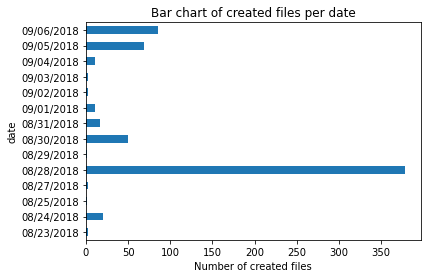

In [81]:
#dates = Counter(created_files.date.apply(lambda x: x.strftime('%d-%m-%Y')) )
dates = Counter(created_files.date)
#print(dates)
counts = dates
index = []
data = []

for k,v in counts.items():
    index.append(k)
    data.append(v)
ts = pd.Series(data, index)
figsize=(15, 10)
ts.plot(kind="barh", title="Bar chart of created files per date")
plt.xlabel('Number of created files')
plt.ylabel('date')
plt.show()





loads of files created on the 28th of Aug. 

In [82]:
# lots of activity on the 28th
df[['date']]

check_date = "2018-08-28"
created_files_check_date = created_files[created_files['date']==check_date].copy()

created_files

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
1227,08/23/2018,09:28:02,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/System Volume Information/SPP/OnlineMetadat...,c:/System Volume Information/SPP/OnlineMetadat...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-23 09:28:02,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 5624,user_gid: 0,NaN
1417,08/23/2018,09:28:43,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/System Volume Information/SPP/SppGroupCache...,c:/System Volume Information/SPP/SppGroupCache...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-23 09:28:43,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 91696,user_gid: 0,NaN
1426,08/23/2018,09:29:05,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/System Volume Information/SPP/SppGroupCache...,c:/System Volume Information/SPP/SppGroupCache...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-23 09:29:05,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 848,user_gid: 0,NaN
7768,08/24/2018,21:29:57,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/ntuser.dat.LOG1,c:/Users/spsql/ntuser.dat.LOG1,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-24 21:29:57,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 0,user_gid: 0,NaN
7769,08/24/2018,21:29:57,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/ntuser.dat.LOG2,c:/Users/spsql/ntuser.dat.LOG2,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-24 21:29:57,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 457728,user_gid: 0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182409,09/06/2018,21:20:20,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/rsydow-a/Documents/20180906/PowerShel...,c:/Users/rsydow-a/Documents/20180906/PowerShel...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-09-06 21:20:20,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 942,user_gid: 0,NaN
182726,09/06/2018,21:34:11,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Windows/System32/SleepStudy/ScreenOn/Screen...,c:/Windows/System32/SleepStudy/ScreenOn/Screen...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-09-06 21:34:11,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 65536,user_gid: 0,NaN
182728,09/06/2018,21:34:11,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/tdungan/AppData/Local/Microsoft/Windo...,c:/Users/tdungan/AppData/Local/Microsoft/Windo...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-09-06 21:34:11,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 16148,user_gid: 0,NaN
183129,09/06/2018,21:51:48,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/tdungan/AppData/Local/Microsoft/Token...,c:/Users/tdungan/AppData/Local/Microsoft/Token...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-09-06 21:51:48,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 14194,user_gid: 0,NaN


In [83]:
created_files_check_date

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users


In [84]:
len(created_files_check_date)

0

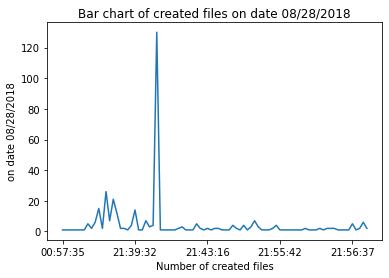

In [85]:
dates = Counter(created_files_on_date.time)
#print(dates)
counts = dates
index = []
data = []

for k,v in counts.items():
    index.append(k)
    data.append(v)
ts = pd.Series(data, index)
figsize=(15, 10)
ts.plot(title="Bar chart of created files on date " + on_date)
plt.xlabel('Number of created files')
plt.ylabel('on date '+ on_date)


plt.show()





around 21:40 ish lots of files created

In [86]:
start_time = '2018-08-28 21:39:40'
end_time = '2018-08-28 21:42:00'
mask = (df['datetime'] > start_time) & (df['datetime'] <= end_time) 
created_files.loc[mask]
# still can see what is going on - would be better in a siem here.

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
32809,08/28/2018,21:39:44,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/LocalLow/Microsoft,c:/Users/spsql/AppData/LocalLow/Microsoft,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:39:44,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 0,user_gid: 0,NaN
32811,08/28/2018,21:39:44,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:39:44,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 0,user_gid: 0,NaN
32812,08/28/2018,21:39:44,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:39:44,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 24,user_gid: 0,NaN
32813,08/28/2018,21:39:44,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:39:44,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 916,user_gid: 0,NaN
32814,08/28/2018,21:39:44,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,c:/Users/spsql/AppData/Roaming/Microsoft/Prote...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:39:44,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 740,user_gid: 0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33503,08/28/2018,21:41:19,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Local/Microsoft/Vault/4...,c:/Users/spsql/AppData/Local/Microsoft/Vault/4...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:41:19,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 352,user_gid: 0,NaN
33504,08/28/2018,21:41:19,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Local/Microsoft/Vault/U...,c:/Users/spsql/AppData/Local/Microsoft/Vault/U...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:41:19,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 0,user_gid: 0,NaN
33546,08/28/2018,21:41:34,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Local/Microsoft/Windows...,c:/Users/spsql/AppData/Local/Microsoft/Windows...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:41:34,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 1454,user_gid: 0,NaN
33547,08/28/2018,21:41:34,MACB,FILE,Mactime Bodyfile,Content Modification Time; Creation Time; Last...,-,c:/Users/spsql/AppData/Local/Microsoft/Windows...,c:/Users/spsql/AppData/Local/Microsoft/Windows...,OS:g:\timeline\YYYYMMDDHHMMSS_MFTECmd_Output.body,...,2018-08-28 21:41:34,None,None,None,md5: 0,mode_as_string: r/rrwxrwxrwx,sha256_hash: 03c25b372c927e6b6b356384dae74b23...,size: 806,user_gid: 0,NaN


user spsql is making a lot of files at this time. 

In [87]:
created_files.loc[mask]
created_files.loc[mask].filename.unique() # stuff sent to g timeline output - data exfiltration? 

array(['OS:g:\\timeline\\YYYYMMDDHHMMSS_MFTECmd_Output.body'],
      dtype=object)

just checking counts

In [88]:
df[['MACB', 'type']].groupby('type').count().sort_values("MACB", ascending=False)

,MACB
type,
Content Modification Time,170547
Metadata Modification Time,5511
Last Visited Time,3583
Creation Time; Last Access Time,724
Last Access Time,688
Creation Time,686
Previous Last Time Executed,663
Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time,654
Content Modification Time; Metadata Modification Time,635


In [89]:
#pd.set_option('display.max_colwidth',1000)# remove elipses to see filename

In [90]:
## check the file downloaded type
df.filename[df.type=='File Downloaded'].unique() # its web history

array(['OS:E:\\C\\Users\\tdungan\\AppData\\Local\\Google\\Chrome\\User Data\\Default\\History'],
      dtype=object)

Whats launch time 

In [91]:
df.filename[df.type=='Launch time'].unique() # 

array(['OS:E:\\C\\Windows\\system32\\config\\SOFTWARE'], dtype=object)

Do some plots

Text(0.5, 1.0, 'Count plot of MACB column')

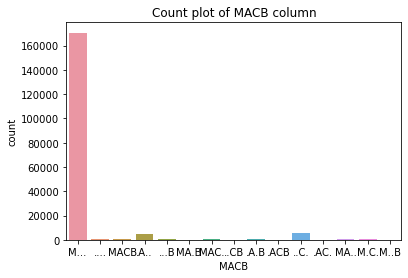

In [92]:
# plot 
ax = sns.countplot(x="MACB", data=df)
plt.title("Count plot of MACB column")


most are M... - hard to see others so plot without M... for a quick look

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '....'),
  Text(1, 0, 'MACB'),
  Text(2, 0, '.A..'),
  Text(3, 0, '...B'),
  Text(4, 0, 'MA.B'),
  Text(5, 0, 'MAC.'),
  Text(6, 0, '..CB'),
  Text(7, 0, '.A.B'),
  Text(8, 0, '.ACB'),
  Text(9, 0, '..C.'),
  Text(10, 0, '.AC.'),
  Text(11, 0, 'MA..'),
  Text(12, 0, 'M.C.'),
  Text(13, 0, 'M..B')])

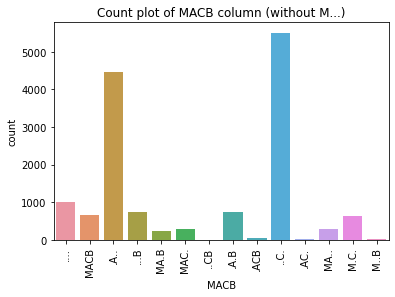

In [93]:
# drop M... to see what the others look look like
sns.countplot(data=df.loc[df['MACB']!="M..."], x='MACB')
plt.title("Count plot of MACB column (without M...)")
plt.xticks(rotation=90)

After M..., .A.. and ..C. are the most frequent which are last visited time and Metadata Modification Time (see below)

In [94]:
df.groupby(['type', 'MACB'])['MACB'].count().sort_values(ascending=False)

type                                                                                    MACB
Content Modification Time                                                               M...    170547
Metadata Modification Time                                                              ..C.      5511
Last Visited Time                                                                       .A..      3583
Creation Time; Last Access Time                                                         .A.B       724
Last Access Time                                                                        .A..       688
Creation Time                                                                           ...B       686
Previous Last Time Executed                                                             ....       663
Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time  MACB       654
Content Modification Time; Metadata Modification Time                              

Plot the counts of 'type' column

Text(0.5, 1.0, 'Count plot of type column')

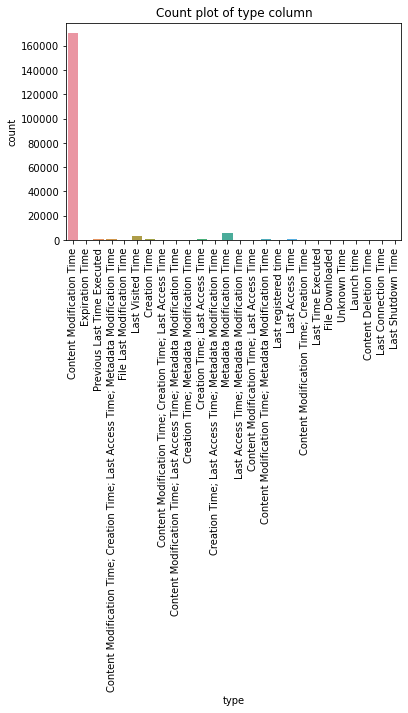

In [95]:
sns.countplot(data=df, x='type')
plt.xticks(rotation=90)
plt.title("Count plot of type column")

content modification time swamps things so plot without it to have a look

Text(0.5, 1.0, 'Count plot of type column (without Content Modification Time)')

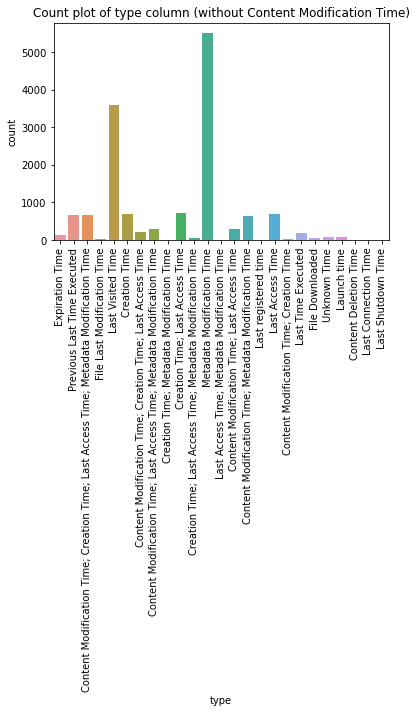

In [96]:
sns.countplot(data=df.loc[df['type']!="Content Modification Time"], x='type')
plt.xticks(rotation=90)
plt.title("Count plot of type column (without Content Modification Time)")

maybe plot the type by date?

In [97]:
df.type.unique()

array(['Content Modification Time', 'Expiration Time',
       'Previous Last Time Executed',
       'Content Modification Time; Creation Time; Last Access Time; Metadata Modification Time',
       'File Last Modification Time', 'Last Visited Time',
       'Creation Time',
       'Content Modification Time; Creation Time; Last Access Time',
       'Content Modification Time; Last Access Time; Metadata Modification Time',
       'Creation Time; Metadata Modification Time',
       'Creation Time; Last Access Time',
       'Creation Time; Last Access Time; Metadata Modification Time',
       'Metadata Modification Time',
       'Last Access Time; Metadata Modification Time',
       'Content Modification Time; Last Access Time',
       'Content Modification Time; Metadata Modification Time',
       'Last registered time', 'Last Access Time',
       'Content Modification Time; Creation Time', 'Last Time Executed',
       'File Downloaded', 'Unknown Time', 'Launch time',
       'Content Delet

<function matplotlib.pyplot.show(close=None, block=None)>

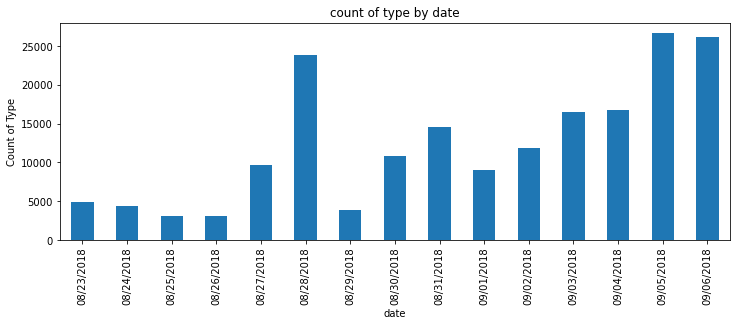

In [102]:
# plot 
fig, ax = plt.subplots(figsize=(12,4))
df.groupby(['date'])['type'].count().plot(ax=ax, kind='bar')
plt.title("Count plot of type grouped by date")
plt.xlabel("date");  # custom x label using matplotlib
plt.ylabel("Count of Type");
plt.title('count of type by date')
plt.show


Loop through the cols and get their pivot counts

In [103]:
for column in df:
    print(column, "\n", df[column].value_counts(), "\n")

date 
 09/05/2018    26672
09/06/2018    26190
08/28/2018    23877
09/04/2018    16699
09/03/2018    16458
08/31/2018    14599
09/02/2018    11827
08/30/2018    10767
08/27/2018     9656
09/01/2018     8988
08/23/2018     4930
08/24/2018     4418
08/29/2018     3865
08/25/2018     3157
08/26/2018     3063
Name: date, dtype: int64 

time 
 21:29:57    1121
21:42:40    1064
21:42:39    1037
21:39:22     657
21:42:38     655
            ... 
21:25:07       1
21:26:06       1
21:32:07       1
21:33:07       1
23:59:15       1
Name: time, Length: 34868, dtype: int64 

MACB 
 M...    170548
..C.      5511
.A..      4472
....       998
...B       736
.A.B       724
MACB       654
M.C.       635
MA..       295
MAC.       287
MA.B       223
.ACB        47
M..B        20
.AC.        14
..CB         2
Name: MACB, dtype: int64 

source 
 EVT        152724
REG         17569
FILE         8769
WEBHIST      4609
LOG          1199
LNK           258
OLECF          29
PE              7
META            1


extra 
 sha256_hash: 94f718e2ab1d4a7051aa33b2863a44574fd2b494306deca84f52c15d9c3302d0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

extra_xml_string 
  user_gid: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Try histograms

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

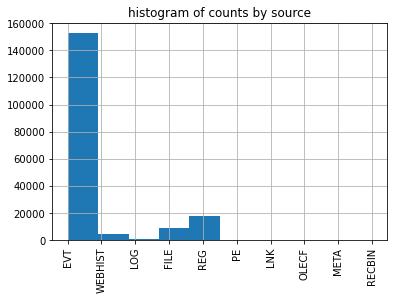

In [104]:
df.source.hist(bins=10)
plt.title('histogram of counts by source')
plt.xticks(rotation=90)

Loop through certain cols to create various histograms

date


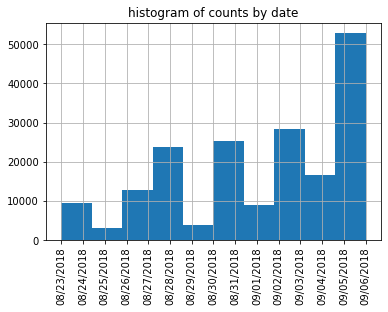

MACB


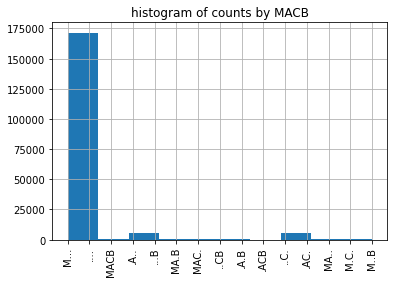

source


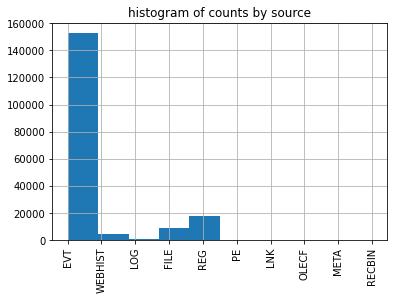

sourcetype


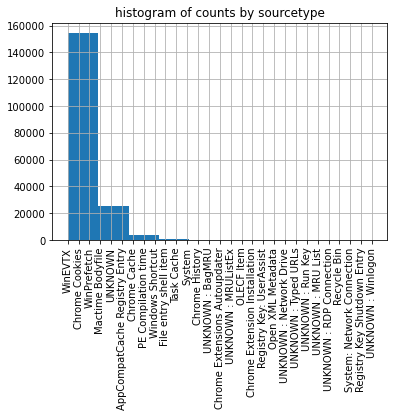

type


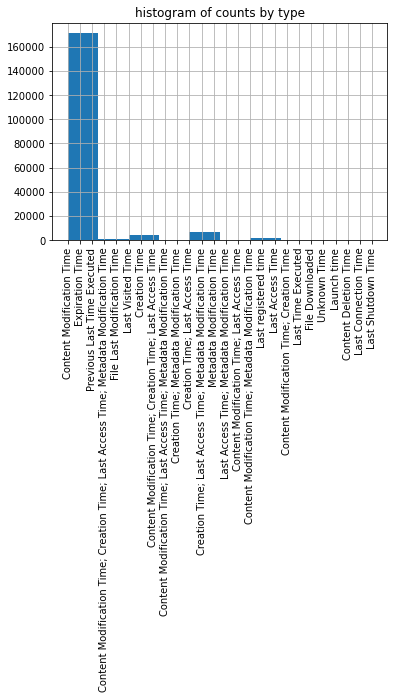

format


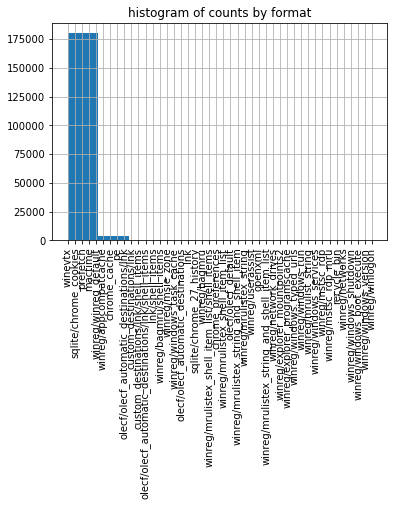

In [105]:
for column in df[['date', 'MACB', 'source', 'sourcetype', 'type', 'format']]:
    print(column)
    df[column].hist(bins=10)
    plt.title('histogram of counts by '+column)
    plt.xticks(rotation=90)
    plt.show()

date


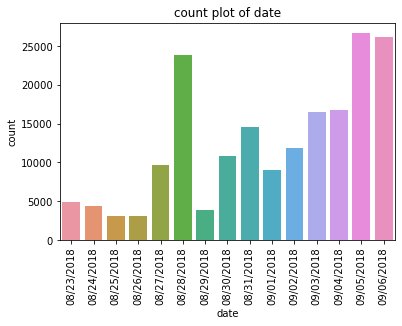

MACB


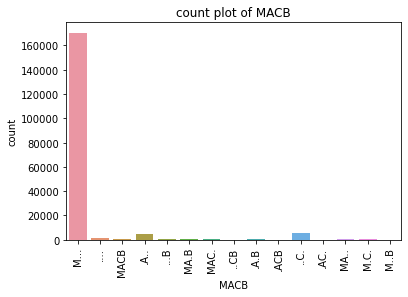

source


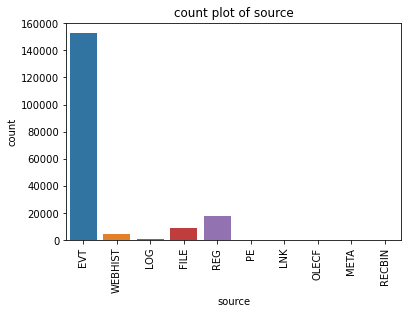

sourcetype


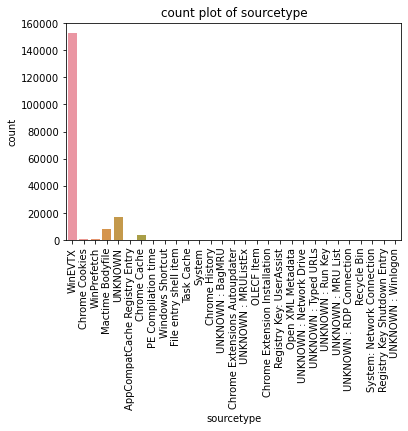

type


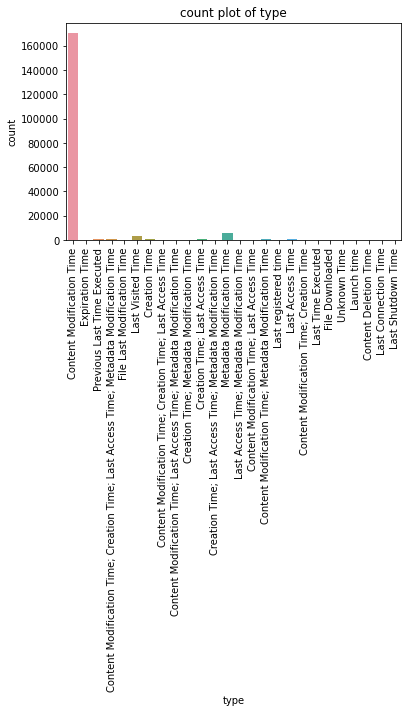

format


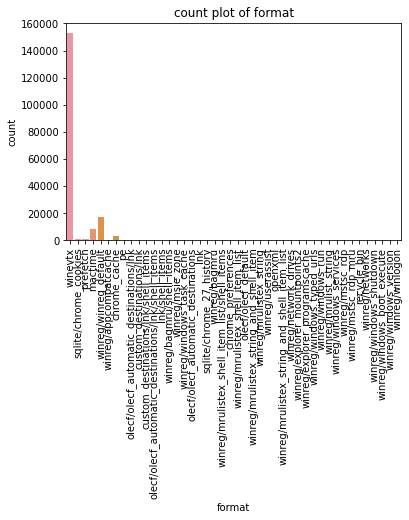

In [107]:
for column in df[['date', 'MACB', 'source', 'sourcetype', 'type', 'format']]:
    print(column)
    ax = sns.countplot(x=column, data=df)
    plt.title('count plot of '+column)
    plt.xticks(rotation=90)
    plt.show()

In [108]:
df.sort_values(by='date')

,date,time,MACB,source,sourcetype,type,host,short,desc,filename,...,datetime,id_dec,id_hex,short string,extra_recovered,extra_sha256_hash,extra_strings_parsed,extra_user_sid,extra_xml_string,filename_users
0,08/23/2018,00:01:01,M...,EVT,WinEVTX,Content Modification Time,-,[107 / 0x006b] Strings: ['\Microsoft\Windows\W...,[107 / 0x006b] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-08-23 00:01:01,107,0x006b,'\Microsoft\Windows\Windows Error Reporting\Qu...,False,cde410aa7b94ef1002200c891682572d7cdc5edc6fd6e...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
3291,08/23/2018,13:43:17,M...,EVT,WinEVTX,Content Modification Time,-,[170 / 0x00aa] Strings: ['Microsoft.Office.One...,[170 / 0x00aa] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-08-23 13:43:17,170,0x00aa,'Microsoft.Office.OneNote_16001.10730.20032.0_...,False,f8da6fe23e2aa25f1c1b79441dd46c2c6cccb2604d4bd...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
3290,08/23/2018,13:43:17,M...,EVT,WinEVTX,Content Modification Time,-,[216 / 0x00d8] Strings: ['http://schemas.micro...,[216 / 0x00d8] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-08-23 13:43:17,216,0x00d8,'http://schemas.microsoft.com/developer/appx/2...,False,f8da6fe23e2aa25f1c1b79441dd46c2c6cccb2604d4bd...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
3289,08/23/2018,13:43:17,M...,EVT,WinEVTX,Content Modification Time,-,[216 / 0x00d8] Strings: ['http://schemas.micro...,[216 / 0x00d8] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-08-23 13:43:17,216,0x00d8,'http://schemas.microsoft.com/developer/appx/2...,False,f8da6fe23e2aa25f1c1b79441dd46c2c6cccb2604d4bd...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
3288,08/23/2018,13:43:17,M...,EVT,WinEVTX,Content Modification Time,-,[157 / 0x009d] Strings: ['CN=Microsoft Corpora...,[157 / 0x009d] Source Name: Microsoft-Windows-...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-08-23 13:43:17,157,0x009d,'CN=Microsoft Corporation O=Microsoft Corpora...,False,f8da6fe23e2aa25f1c1b79441dd46c2c6cccb2604d4bd...,{},S-1-5-18,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167700,09/06/2018,11:30:44,M...,EVT,WinEVTX,Content Modification Time,-,"[8001 / 0x1f41] Strings: ['Decoding: {""entitle...",[8001 / 0x1f41] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-06 11:30:44,8001,0x1f41,"'Decoding: {""entitlementSatisfaction"":""Open"" ""...",False,699f48caecf181748a7ccdd17657e9bb8ea1a08783286...,{},S-1-5-21-3445421715-2530590580-3149308974-1116,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
167699,09/06/2018,11:30:44,M...,EVT,WinEVTX,Content Modification Time,-,[8001 / 0x1f41] Strings: ['Getting lease for 0...,[8001 / 0x1f41] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-06 11:30:44,8001,0x1f41,'Getting lease for 0116DC02-781B-D1D1-FC1C-C80...,False,699f48caecf181748a7ccdd17657e9bb8ea1a08783286...,{},S-1-5-19,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
167698,09/06/2018,11:30:44,M...,EVT,WinEVTX,Content Modification Time,-,[8001 / 0x1f41] Strings: ['Returning key docum...,[8001 / 0x1f41] Source Name: Microsoft-Windows...,OS:E:\C\Windows\system32\winevt\logs\Microsoft...,...,2018-09-06 11:30:44,8001,0x1f41,'Returning key document for contentid 0116DC02...,False,699f48caecf181748a7ccdd17657e9bb8ea1a08783286...,{},S-1-5-21-3445421715-2530590580-3149308974-1116,"<Event xmlns=""http://schemas.microsoft.com/wi...",system32
167708,09/06/2018,11:30:44,M...,EVT,WinEVTX,Content Modification Time,-,[8001 / 0x1f41] Strings: ['[118c] [000001FDF21...,[8001 / 0x1f41] Source Name: 

look for created files near remote desktop execution 

In conclusion you can do a lot of analysis on log data with python. In particular it gives you an overall feel for the data.